# Import dependencies

In [1]:
#import all 
%matplotlib inline
from pandas.io.parsers import read_csv
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import collections
import scipy

import scanpy as sc
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.set_figure_params(dpi=50, color_map = 'viridis')

/Users/m.blotenburg/miniconda3/envs/scanpy2/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.4.1 scikit-learn==0.23.2 statsmodels==0.12.2 pynndescent==0.5.6


In [2]:
sns.set_style('white')
sns.set_context("talk")
dpi = 50

# Import dataframe

In [3]:
pathToData = '/Users/m.blotenburg/Documents/Projects/Mouse_Scartrace/Data_analysis/Scar_analysis/'

In [4]:
clone5 = read_csv(pathToData + '/DynamicData/countTableDynamicDataClone5.tsv', sep = ',', low_memory=False, index_col=(0,1,2,3))
clone5 = clone5[sorted(clone5.columns)]
clone5 = clone5.loc[[idx for idx in clone5.index if 'Unknown'!=idx]]
clone5.columns = clone5.columns.str.replace('MB-Bulk-Clone5-FACS0806_AHYFGMBGX5_S2_','')
clone5.index.names = ['chrom','allele','site', 'scar']
clone5_s = clone5.drop(['112', '121', '124', '132', '136', '142', '148', '150', '157',
       '161', '167', '171', '175', '183', '186', '19', '192', '196',
       '200', '202', '21', '213', '215', '220', '224', '226', '227', '229',
       '232', '241', '246', '253', '258', '259', '26', '266', '269', '275',
       '279', '283', '296', '298', '300', '303', '311', '313', '328',
       '331', '334', '337', '338', '34', '346', '351', '353', '36', '368',
       '37', '376', '379', '381', '42', '43', '44', '48', '69','71', '75', '78', '79', 
             '89', '95', '96', '99'], axis=1)



#clone5_s.columns = ['4, Scarlet', '4, Negative', '4, Neongreen', '3, Scarlet', '2, Scarlet', '1, Scarlet', '9, Scarlet' ]
clone5_s.columns = ['4', '4Neg', '4NG', '3', '2', '1', '9' ]


clone5_s = clone5_s.iloc[1:]

In [5]:
clone5_s.head()

4  4Neg  4NG   3    2    1    9
chrom allele site      scar                                  
1     NaN    103040340 WT   NaN   2.0  NaN NaN  2.0  2.0  NaN
             103040341 WT   NaN   NaN  4.0 NaN  NaN  NaN  8.0
             11294105  WT   NaN   4.0  NaN NaN  NaN  NaN  NaN
             129496476 WT   NaN   2.0  NaN NaN  NaN  NaN  NaN
             150331045 WT   NaN   NaN  2.0 NaN  NaN  2.0  NaN

In [6]:
sf = clone5_s.loc['12']

sf_129 = sf.loc['129S1_SvImJ']
sf_B6 = sf.loc['C57BL_6NJ']

nonallelic = sf.drop(['C57BL_6NJ','129S1_SvImJ','129S1_SvImJ,C57BL_6NJ'])

indexNonAllelic = nonallelic.index.droplevel(0)
sf_nonallelic = nonallelic.copy()
sf_nonallelic.index = indexNonAllelic

select only barcodes that were used, remove contamination

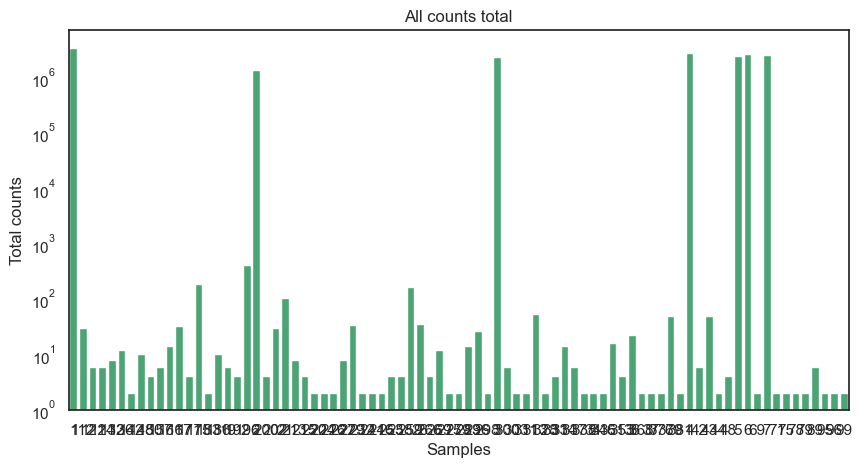

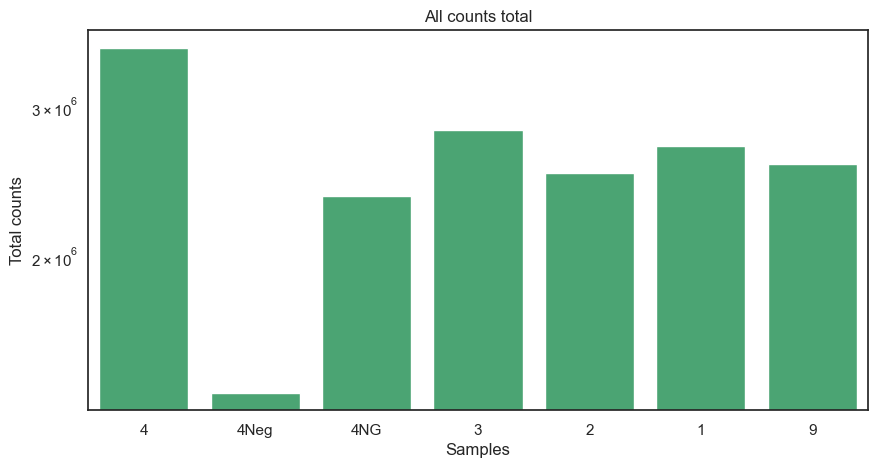

In [7]:
sums_cells_all_s = clone5_s.sum(axis=0)
sums_cells_all = clone5.sum(axis=0)

#all counts total
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_all.index, y=sums_cells_all, log='y',color='mediumseagreen')
ax.set_title('All counts total')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

#all counts total
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_all_s.index, y=sums_cells_all_s, log='y',color='mediumseagreen')
ax.set_title('All counts total')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

# Plot QC

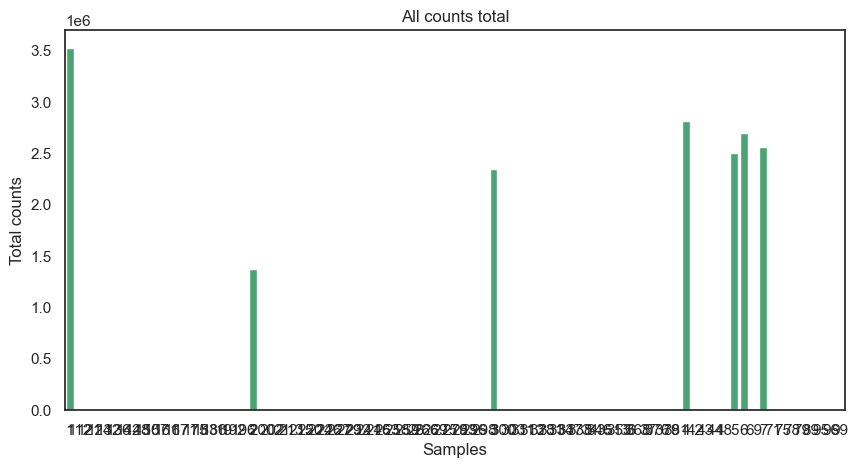

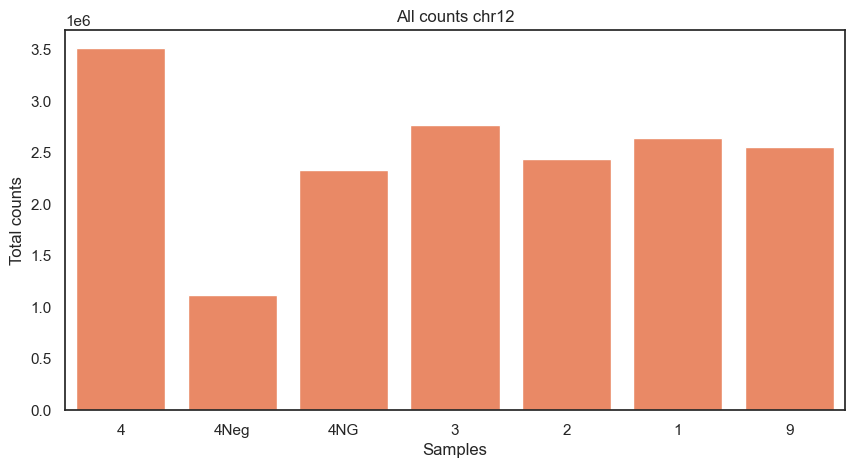

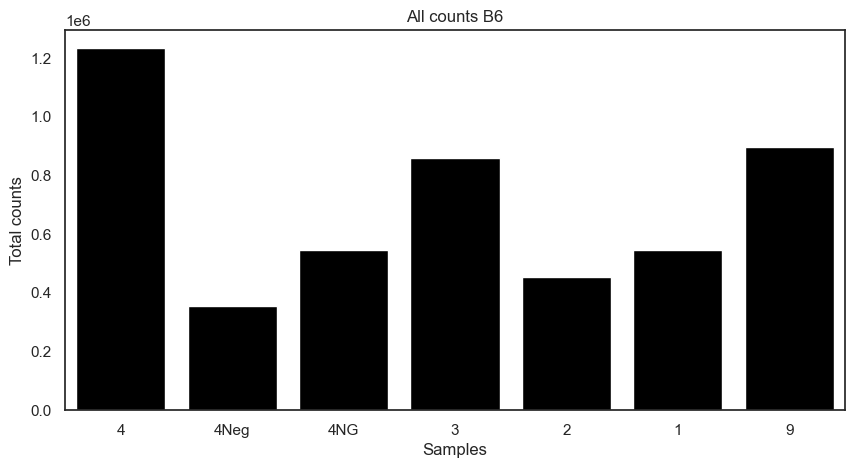

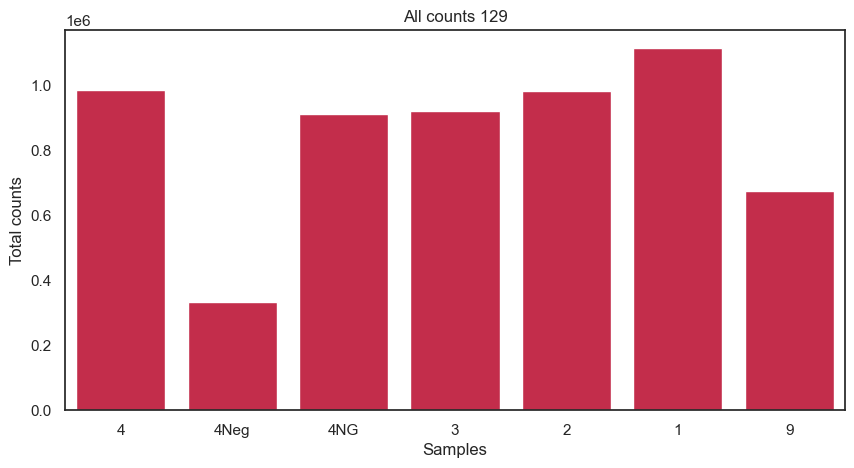

In [8]:
sums_cells_all = clone5.sum(axis=0)
sums_cells_12 = sf.sum(axis=0)
sums_cells_B6 = sf_B6.sum(axis=0)
sums_cells_129 = sf_129.sum(axis=0)

#all counts total
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_all.index, y=sums_cells_all, color='mediumseagreen')
ax.set_title('All counts total')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

#all counts chromosome 12
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_12.index, y=sums_cells_12, color="coral")
ax.set_title('All counts chr12')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

# all counts per allele
#sf.loc['C57BL_6NJ']
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_B6.index, y=sums_cells_B6, color='black')
ax.set_title('All counts B6')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

#sf.loc['129S1_SvImJ'].sum(axis=0)
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_129.index, y=sums_cells_129, color='crimson')
ax.set_title('All counts 129')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

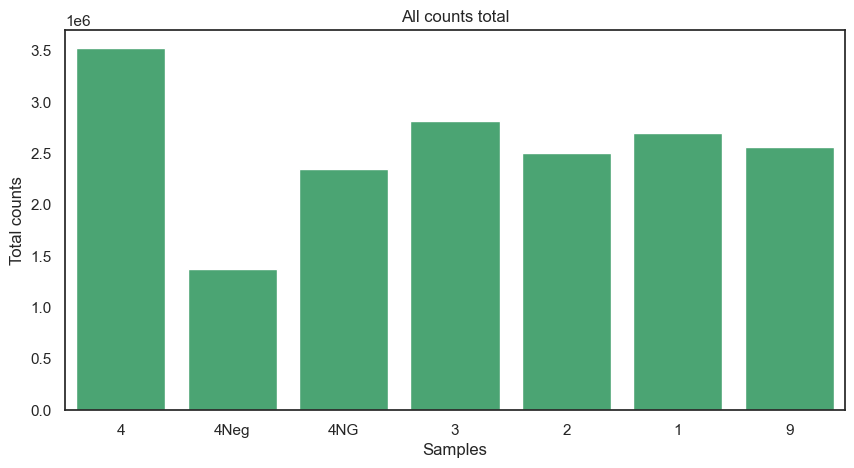

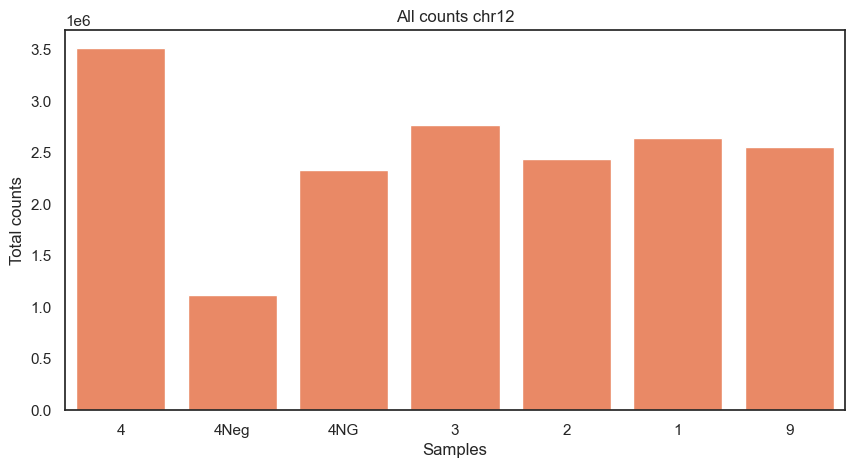

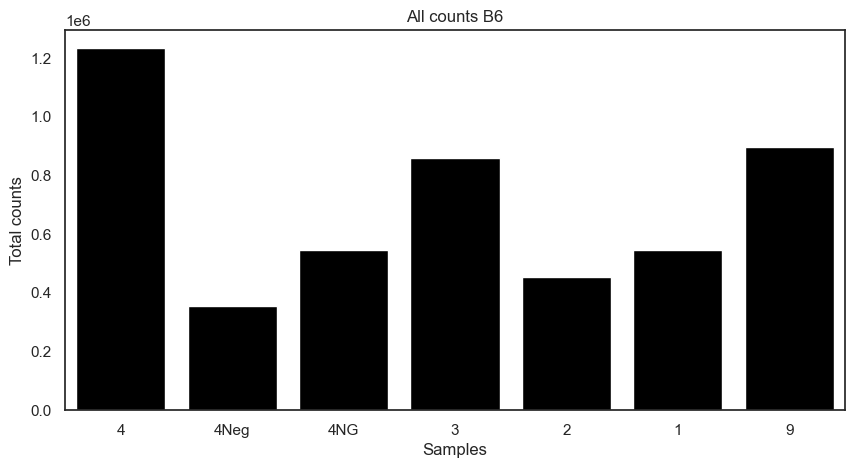

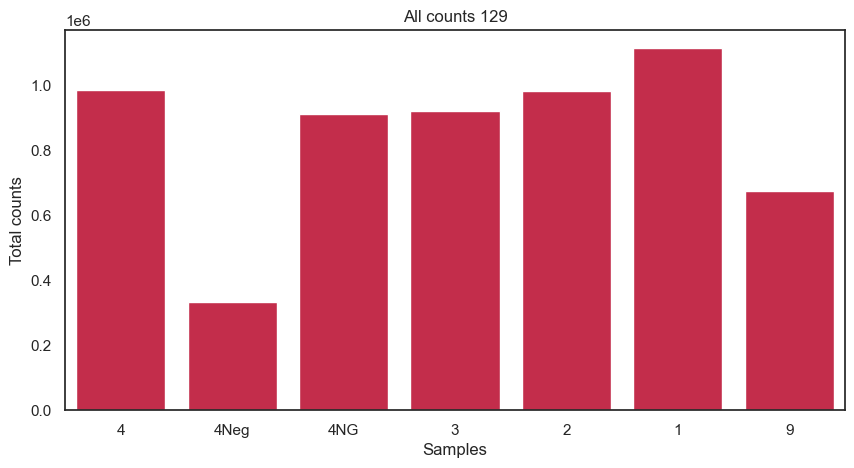

In [9]:
sf = clone5_s.loc['12']

sf_129 = sf.loc['129S1_SvImJ']
sf_B6 = sf.loc['C57BL_6NJ']

nonallelic = sf.drop(['C57BL_6NJ','129S1_SvImJ','129S1_SvImJ,C57BL_6NJ'])

indexNonAllelic = nonallelic.index.droplevel(0)
sf_nonallelic = nonallelic.copy()
sf_nonallelic.index = indexNonAllelic

sums_cells_all = clone5_s.sum(axis=0)
sums_cells_12 = sf.sum(axis=0)
sums_cells_B6 = sf_B6.sum(axis=0)
sums_cells_129 = sf_129.sum(axis=0)

#all counts total
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_all.index, y=sums_cells_all, color='mediumseagreen')
ax.set_title('All counts total')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

#all counts chromosome 12
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_12.index, y=sums_cells_12, color="coral")
ax.set_title('All counts chr12')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

# all counts per allele
#sf.loc['C57BL_6NJ']
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_B6.index, y=sums_cells_B6, color='black')
ax.set_title('All counts B6')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

#sf.loc['129S1_SvImJ'].sum(axis=0)
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_129.index, y=sums_cells_129, color='crimson')
ax.set_title('All counts 129')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

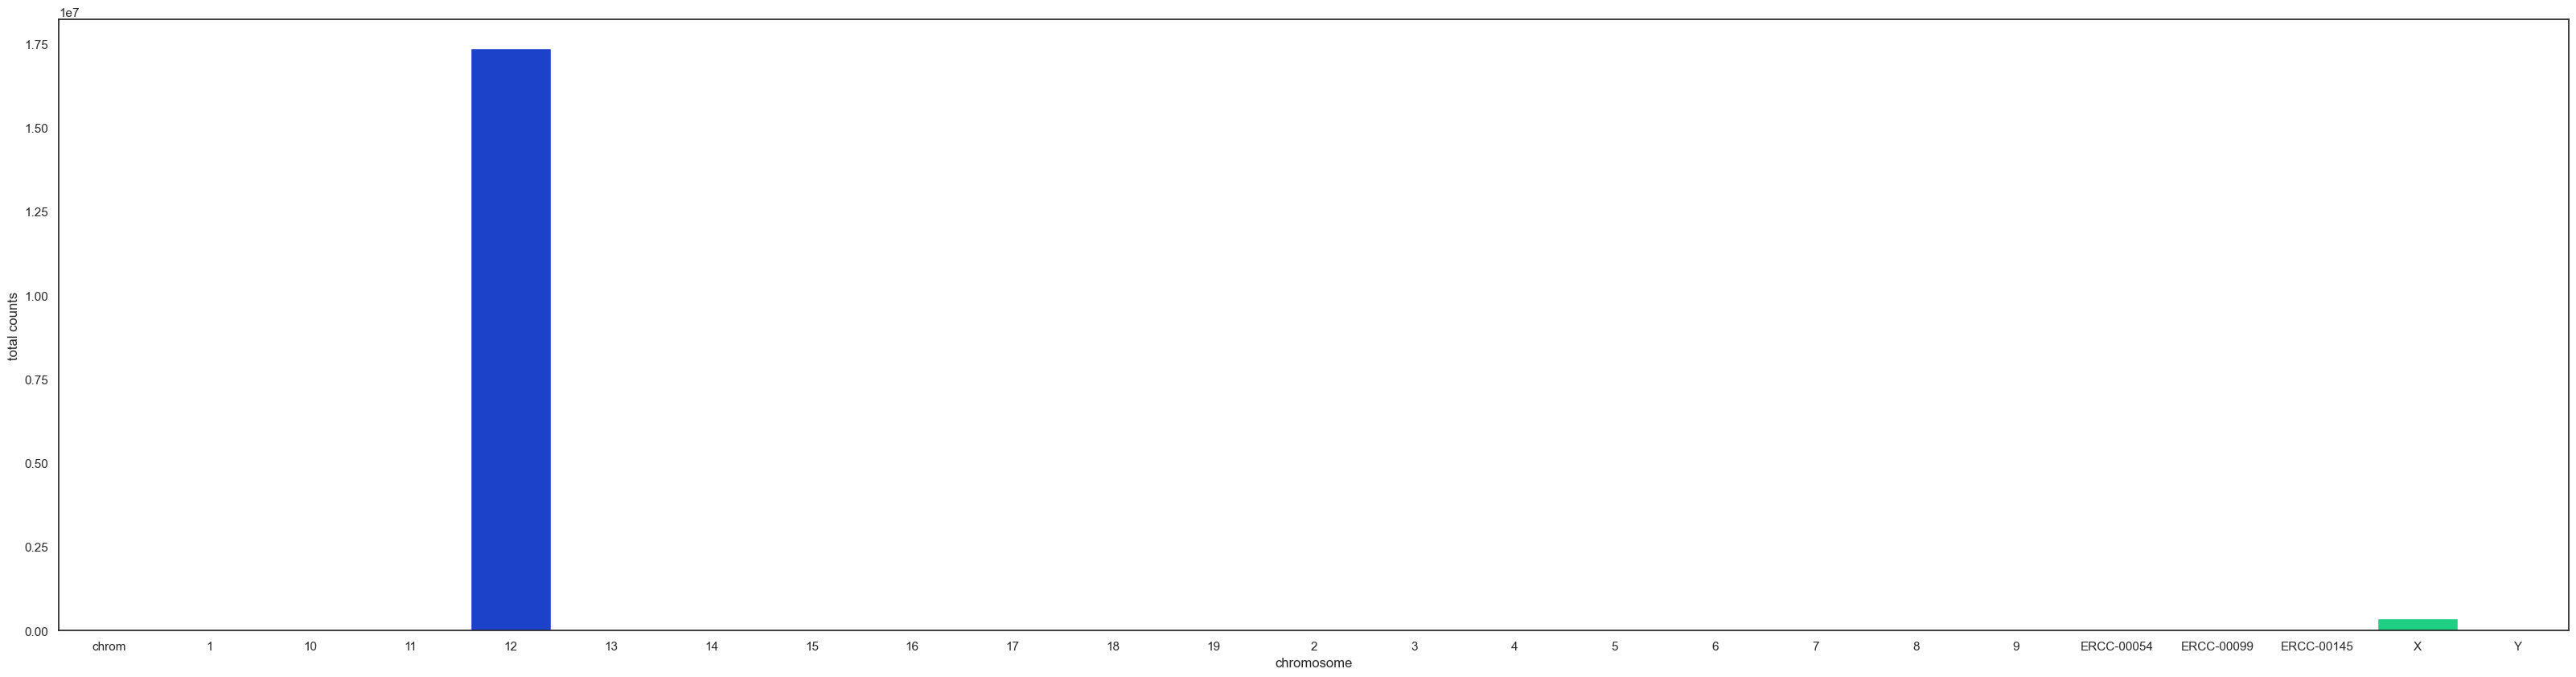

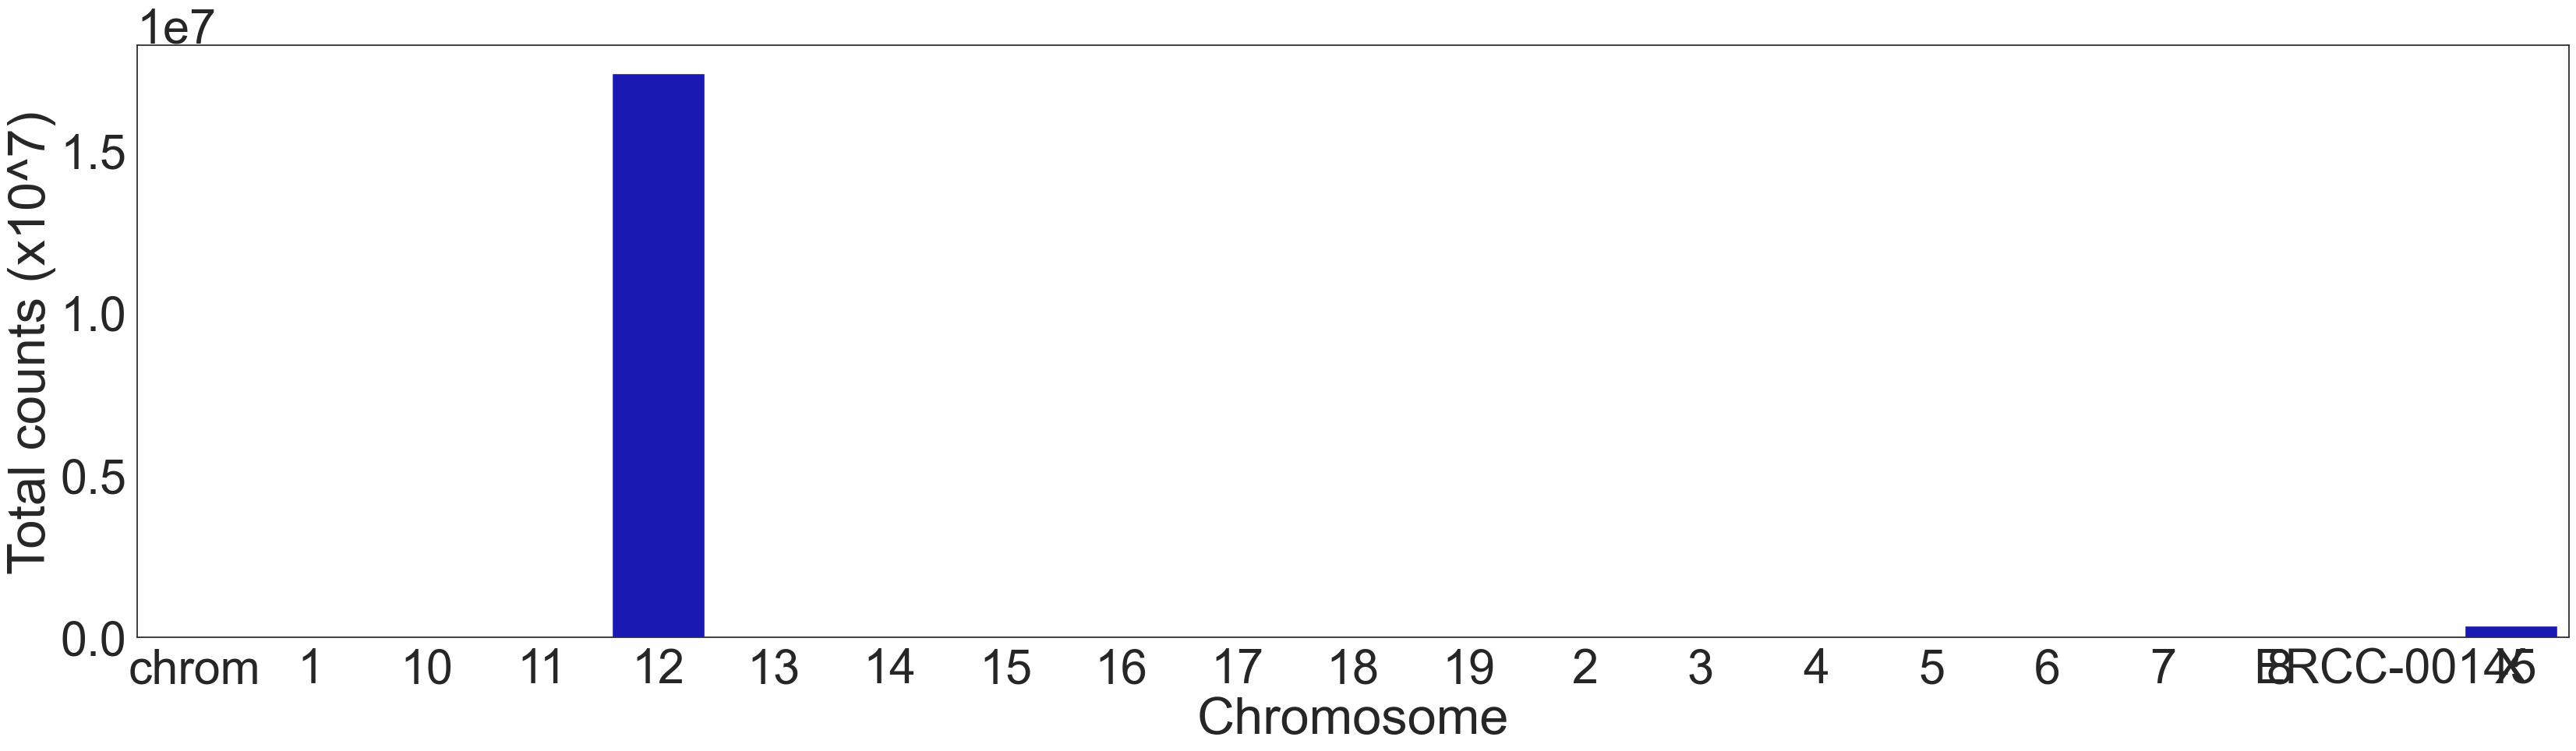

In [10]:
#Plot raw counts per chromosome
sums_cells = clone5.sum(axis=0, level=0)
countsPerChrom = sums_cells.sum(axis=1)
selection = countsPerChrom.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,22,23]]
#myorder=[0,11,12,13,14,15,16,17,18,1,2,3,4,5,6,7,8,9,10,19,20,]
#selection.index = [ selection.index[i] for i in myorder]

sns.set(style="white")
plt.figure(figsize=(40,10))
ax = sns.barplot(x=countsPerChrom.index, y=countsPerChrom, palette="winter")
ax.set(xlabel='chromosome', ylabel='total counts')
plt.show()

sns.set(style="white", font_scale=4)
plt.figure(figsize=(40,10))
#ax = sns.barplot(x=selection.index, y=selection, palette="winter")
ax = sns.barplot(x=selection.index, y=selection, color='mediumblue')
ax.set(xlabel='Chromosome', ylabel='Total counts (x10^7)')
#ax.tick_params(labelsize=17.5)
#plt.xlabel('Chromosome', fontsize=32); plt.ylabel('Total counts', fontsize=32)

plt.show()

# Calculate percentages

In [11]:
sitesB6 = []
sites129 = []
sitesNA = []
for (chrom,allele,site,scar) in clone5_s.index:
    if chrom == '12':
        if allele == 'C57BL_6NJ':
            if site not in sitesB6:
                sitesB6.append(site)
        if allele == '129S1_SvImJ':
            if site not in sites129:
                sites129.append(site)
        if allele != 'C57BL_6NJ' and allele != '129S1_SvImJ' and allele !='129S1_SvImJ,C57BL_6NJ' :
            if site not in sitesNA:
                sitesNA.append(site)

In [12]:
#129
sf_129 = sf_129.fillna(0)
cellToSiteToScarPercentage129 = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))
for sample in sf_129.columns:
    for site in sites129:
        if len(sf_129.loc[site])==0:
            continue
        totalReadsForThisSite = sf_129.loc[site, sample].sum()
        if totalReadsForThisSite == 0:
            continue
        for scar, amountOfReads in sf_129.loc[site,sample].iteritems():
            percentage = (amountOfReads / totalReadsForThisSite)*100.0
            if percentage>0.1:
                cellToSiteToScarPercentage129[sample][int(site)][scar] += percentage

#129
percentagesChrom12 = collections.defaultdict(dict) # (cell, gastruloid)->(site,scar)-> value (.. ,1,2)

for sample, allSitesForThisCell in cellToSiteToScarPercentage129.items():
    for site, allScarsForThisSite in allSitesForThisCell.items():
        for scar, percentage in allScarsForThisSite.most_common(500):
            percentagesChrom12[sample][(site,scar)] = percentage

percentagesChr12_129 = pd.DataFrame(percentagesChrom12)

In [13]:
#B6
sf_B6 = sf_B6.fillna(0)
cellToSiteToScarPercentageB6 = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))
for sample in sf_B6.columns:
    for site in sitesB6:
        if len(sf_B6.loc[site])==0:
            continue
        totalReadsForThisSite = sf_B6.loc[site, sample].sum()
        if totalReadsForThisSite == 0:
            continue
        for scar, amountOfReads in sf_B6.loc[site,sample].iteritems():
            percentage = (amountOfReads / totalReadsForThisSite)*100.0
            if percentage>0.1:
                cellToSiteToScarPercentageB6[sample][int(site)][scar] += percentage


percentagesChr12B6 = collections.defaultdict(dict) # (cell, gastruloid)->(site,scar)-> value (.. ,1,2)
for sample, allSitesForThisCell in cellToSiteToScarPercentageB6.items():
    for site, allScarsForThisSite in allSitesForThisCell.items():
        for scar, percentage in allScarsForThisSite.most_common(500):
            percentagesChr12B6[sample][(site,scar)] = percentage

percentagesChr12_B6 = pd.DataFrame(percentagesChr12B6)


In [14]:
#nonallelic
sf_nonallelic = sf_nonallelic.fillna(0)                
cellToSiteToScarPercentageNA = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))
for sample in sf_nonallelic.columns:
    for site in sitesNA:
        if len(sf_nonallelic.loc[site])==0:
            continue
        totalReadsForThisSite = sf_nonallelic.loc[site, sample].sum()
        if totalReadsForThisSite == 0:
            continue
        for scar, amountOfReads in sf_nonallelic.loc[site,sample].iteritems():
            percentage = (amountOfReads / totalReadsForThisSite)*100.0
            if percentage>0.1:
                cellToSiteToScarPercentageNA[sample][int(site)][scar] += percentage

percentagesChr12NA = collections.defaultdict(dict) # (cell, gastruloid)->(site,scar)-> value (.. ,1,2)
for sample, allSitesForThisCell in cellToSiteToScarPercentageNA.items():
    for site, allScarsForThisSite in allSitesForThisCell.items():
        for scar, percentage in allScarsForThisSite.most_common(500):
            percentagesChr12NA[sample][(site,scar)] = percentage

percentagesChr12_NA = pd.DataFrame(percentagesChr12NA)


# plotting

Select only target sites that could contain scars, remove contamination

In [15]:
targetsites = [114682729, 14708745, 114723869, 114740505,114746371, 114788470, 114843748, 114851288,
          114879985,114896335,114910108,114914696,114736342]
sites129 = []
for site in percentagesChr12_129.index.levels[0].unique():
    if site in targetsites:
        sites129.append(site)
sitesB6 = []
for site in percentagesChr12_B6.index.levels[0].unique():
    if site in targetsites:
        sitesB6.append(site)        
        
selectedpercentagesChr12_129 = percentagesChr12_129.loc[sites129] 
selectedpercentagesChr12_B6 = percentagesChr12_B6.loc[sitesB6] 


Combine all sites per sample

In [16]:
allSites4 = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))

for site, scar in selectedpercentagesChr12_129['4'].index:
    allSites4[scar][('129', site)] = percentagesChr12_129['4'].loc[(site,scar)]

for site, scar in selectedpercentagesChr12_B6['4'].index:
    allSites4[scar][('B6', site)] = percentagesChr12_B6['4'].loc[(site,scar)]
    
allSites4 = pd.DataFrame(allSites4)

In [17]:
allSites4ng = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))

for site, scar in selectedpercentagesChr12_129['4NG'].index:
    allSites4ng[scar][('129', site)] = percentagesChr12_129['4NG'].loc[(site,scar)]

for site, scar in selectedpercentagesChr12_B6['4NG'].index:
    allSites4ng[scar][('B6', site)] = percentagesChr12_B6['4NG'].loc[(site,scar)]
    
allSites4ng = pd.DataFrame(allSites4ng)



In [18]:
index = allSites4.index.tolist()
index = index[0:8] + index[11:13] + index[14:]
allSites4 = allSites4.loc[index]
allSites4ng = allSites4ng.loc[index]

Calculate number of unique scars per sample, calculate percentage of WT vs scars per sample.

In [19]:
allSites4.index = allSites4.index.set_levels(allSites4.index.levels[1].astype(str),level=1)
allSites4.index = ['_'.join(ind) for ind in allSites4.index.values]
allSites42 = allSites4.copy()
allSites42 = allSites42.T
newdict = {}
for sample in allSites42:
    newdict[sample] = len(allSites42[allSites42[sample] >= 0.05])
uniqueScars_scarlet = pd.DataFrame(list(newdict.items()),columns = ['full_sample','uniqueScars'])


In [20]:
allSites4ng.index = allSites4ng.index.set_levels(allSites4ng.index.levels[1].astype(str),level=1)
allSites4ng.index = ['_'.join(ind) for ind in allSites4ng.index.values]
allSites4ng2 = allSites4ng.copy()
allSites4ng2 = allSites4ng2.T
newdict = {}
for sample in allSites4ng2:
    newdict[sample] = len(allSites4ng2[allSites4ng2[sample] >= 0.05])
uniqueScars_ng = pd.DataFrame(list(newdict.items()),columns = ['full_sample','uniqueScars'])




In [21]:
WTcounts = pd.DataFrame(allSites4['WT']).rename(columns={'WT':'Percentage'})
WTcounts['Fluorescence'] = 'Scarlet'
WTcounts = WTcounts.reset_index().rename(columns={'index':'full_sample'})
WTcounts = pd.merge(WTcounts, uniqueScars_scarlet, left_on='full_sample', right_on='full_sample')
WT2 = pd.DataFrame(allSites4ng['WT']).rename(columns={'WT':'Percentage'})
WT2['Fluorescence'] = 'Neongreen'
WT2 = WT2.reset_index().rename(columns={'index':'full_sample'})
WT2 = pd.merge(WT2, uniqueScars_ng, left_on='full_sample', right_on='full_sample')
WTcounts = pd.concat([WT2,WTcounts])
scarcounts = WTcounts.copy()
scarcounts['Percentage'] = 100 - WTcounts['Percentage']
scarcounts['Type'] = 'Scar'
WTcounts['Type'] = 'WT'
WTcounts = pd.concat([WTcounts, scarcounts])


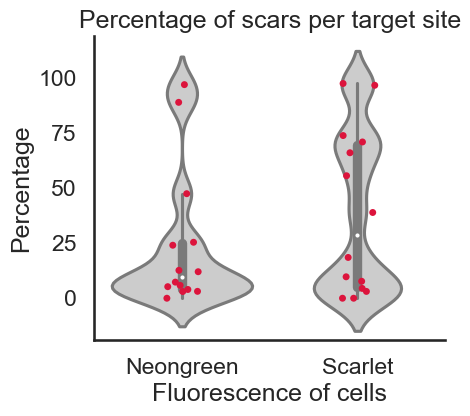

In [22]:
sc.set_figure_params(dpi=dpi, color_map = 'viridis')
sns.set_style('white')
sns.set_context("talk")


fig, ax = plt.subplots(figsize=(4.5,4), dpi = dpi)
cols = ['crimson','crimson']

sns.violinplot(x="Fluorescence", y="Percentage", #hue = 'Type', 
               data=WTcounts[WTcounts['Type'] == 'Scar'],
               #,split = True, 
               color="0.8", alpha = 0.7,bw=.20)
sns.stripplot(x="Fluorescence", y="Percentage", hue = 'Type', 
              data=WTcounts[WTcounts['Type'] == 'Scar'], 
              palette = cols, jitter=True)#, dodge = True)

#ax.set_xlim(-0.5,8)
ax.set_ylim(-19,119)
ax.set_ylabel("Percentage")
ax.set_xlabel("Fluorescence of cells")
ax.set_title("Percentage of scars per target site")
ax.legend([], frameon=False)
#ax.legend(loc = 'upper ri`ght')
sns.despine()

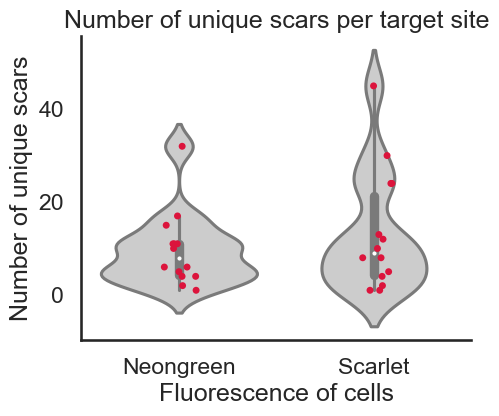

In [23]:
sc.set_figure_params(dpi=dpi, color_map = 'viridis')
sns.set_style('white')
sns.set_context("talk")


fig, ax = plt.subplots(figsize=(5,4), dpi = dpi)
cols = ['crimson','crimson']

sns.violinplot(x="Fluorescence", y="uniqueScars", data=WTcounts[WTcounts['Type'] == 'Scar'],split = True, 
               color="0.8", alpha = 0.7,bw=.3)
sns.stripplot(x="Fluorescence", y="uniqueScars",  data=WTcounts[WTcounts['Type'] == 'Scar'], 
              palette = cols, jitter=True, dodge = True)

#ax.set_xlim(-0.5,8)
#ax.set_ylim(-19,119)
ax.set_ylabel("Number of unique scars")
ax.set_xlabel("Fluorescence of cells")
ax.set_title("Number of unique scars per target site")
ax.legend([], frameon=False)
#ax.legend(loc = 'upper right')
sns.despine()

In [24]:
cols=['black',"#C895C5", #"#320033", 
      "#FF6832", "#66E1D3", "#CFCDAC", "#D0AC94", "#7ED379", "#012C58","#008941", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#006FA6", "#A30059","#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80","#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100","#7A7BFF", "#D68E01", "#353339", "#78AFA1", "#FEB2C6", "#75797C", "#837393", "#943A4D", "#B5F4FF", "#D2DCD5", "#9556BD", "#6A714A", "#001325", "#02525F", "#0AA3F7", "#E98176","#DBD5DD", "#5EBCD1", "#3D4F44", "#7E6405", "#02684E", "#962B75", "#8D8546", "#9695C5", "#E773CE", "#D86A78", "#3E89BE", "#CA834E", "#518A87", "#5B113C", "#55813B", "#E704C4", "#00005F", "#A97399", "#4B8160", "#59738A", "#FF5DA7", "#F7C9BF", "#643127", "#513A01","#83AB58", "#001C1E", "#D1F7CE", "#004B28", "#C8D0F6", "#A3A489", "#806C66", "#222800","#BF5650", "#E83000", "#66796D", "#DA007C", "#FF1A59", "#8ADBB4", "#1E0200", "#5B4E51","#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700","#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329","#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C","#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F","#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09","#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66","#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00","#BDC9D2", "#9FA064", "#BE4700", "#658188", "#83A485", "#453C23", "#47675D", "#3A3F00","#061203", "#DFFB71", "#868E7E", "#98D058", "#6C8F7D", "#D7BFC2", "#3C3E6E", "#D83D66","#2F5D9B", "#6C5E46", "#D25B88", "#5B656C", "#00B57F", "#545C46", "#866097", "#365D25","#252F99", "#00CCFF", "#674E60", "#FC009C", "#92896B", "#1E2324", "#DEC9B2", "#9D4948","#85ABB4", "#342142", "#D09685", "#A4ACAC", "#00FFFF", "#AE9C86", "#742A33", "#0E72C5","#AFD8EC", "#C064B9", "#91028C", "#FEEDBF", "#FFB789", "#9CB8E4", "#AFFFD1", "#2A364C","#4F4A43", "#647095", "#34BBFF", "#807781", "#920003", "#B3A5A7", "#018615", "#F1FFC8","#976F5C", "#FF3BC1", "#FF5F6B", "#077D84", "#F56D93", "#5771DA", "#4E1E2A", "#830055","#02D346", "#BE452D", "#00905E", "#BE0028", "#6E96E3", "#007699", "#FEC96D", "#9C6A7D","#3FA1B8", "#893DE3", "#79B4D6", "#7FD4D9", "#6751BB", "#B28D2D", "#E27A05", "#DD9CB8","#AABC7A", "#980034", "#561A02", "#8F7F00", "#635000", "#CD7DAE", "#8A5E2D", "#FFB3E1","#6B6466", "#C6D300", "#0100E2", "#88EC69", "#8FCCBE", "#21001C", "#511F4D", "#E3F6E3","#FF8EB1", "#6B4F29", "#A37F46", "#6A5950", "#1F2A1A", "#04784D", "#101835", "#E6E0D0","#FF74FE", "#00A45F", "#8F5DF8", "#4B0059", "#412F23", "#D8939E", "#DB9D72", "#604143","#B5BACE", "#989EB7", "#D2C4DB", "#A587AF", "#77D796", "#7F8C94", "#FF9B03", "#555196","#31DDAE", "#74B671", "#802647", "#2A373F", "#014A68", "#696628", "#4C7B6D", "#002C27","#7A4522", "#3B5859", "#E5D381", "#FFF3FF", "#679FA0", "#261300", "#2C5742", "#9131AF","#AF5D88", "#C7706A", "#61AB1F", "#8CF2D4", "#C5D9B8", "#9FFFFB", "#BF45CC", "#493941","#863B60", "#B90076", "#003177", "#C582D2", "#C1B394", "#602B70", "#887868", "#BABFB0","#030012", "#D1ACFE", "#7FDEFE", "#4B5C71", "#A3A097", "#E66D53", "#637B5D", "#92BEA5","#6B94AA", "#51A058", "#A45B02", "#1D1702", "#E20027", "#E7AB63", "#4C6001", "#9C6966","#64547B", "#97979E", "#006A66", "#391406", "#F4D749", "#0045D2", "#006C31", "#DDB6D0","#7C6571", "#9FB2A4", "#00D891", "#15A08A", "#BC65E9", "#FFFFFE", "#C6DC99", "#203B3C","#671190", "#6B3A64", "#F5E1FF", "#FFA0F2", "#CCAA35", "#374527", "#8BB400", "#797868","#C6005A", "#3B000A", "#C86240", "#29607C", "#402334", "#7D5A44", "#CCB87C", "#B88183","#AA5199", "#B5D6C3", "#A38469", "#9F94F0", "#A74571", "#B894A6", "#71BB8C", "#00B433","#789EC9", "#6D80BA", "#953F00", "#5EFF03", "#E4FFFC", "#1BE177", "#BCB1E5", "#76912F","#003109", "#0060CD", "#D20096", "#895563", "#29201D", "#5B3213", "#A76F42", "#89412E","#1A3A2A", "#494B5A", "#A88C85", "#F4ABAA", "#A3F3AB", "#00C6C8", "#EA8B66", "#958A9F", "#00F8B3", "#BEDDFF", "#3DB5A7", "#DD3248", "#B6E4DE", "#427745", "#598C5A", "#B94C59","#8181D5", "#94888B", "#FED6BD", "#536D31", "#6EFF92", "#E4E8FF", "#20E200", "#FFD0F2","#4C83A1", "#BD7322", "#915C4E", "#8C4787", "#025117", "#A2AA45", "#2D1B21", "#A9DDB0","#FF4F78", "#528500", "#009A2E", "#17FCE4", "#71555A", "#525D82", "#00195A", "#967874","#555558", "#0B212C", "#1E202B", "#EFBFC4", "#6F9755", "#6F7586", "#501D1D", "#372D00","#741D16", "#5EB393", "#B5B400", "#DD4A38", "#363DFF", "#AD6552", "#6635AF", "#836BBA","#98AA7F", "#464836", "#322C3E", "#7CB9BA", "#5B6965", "#707D3D", "#7A001D", "#6E4636","#443A38", "#AE81FF", "#489079", "#897334", "#009087", "#DA713C", "#361618", "#FF6F01","#006679", "#370E77", "#4B3A83", "#C9E2E6", "#C44170", "#FF4526", "#73BE54", "#C4DF72","#ADFF60", "#00447D", "#DCCEC9", "#BD9479", "#656E5B", "#EC5200", "#FF6EC2", "#7A617E","#DDAEA2", "#77837F", "#A53327", "#608EFF", "#B599D7", "#A50149", "#4E0025", "#C9B1A9","#03919A", "#1B2A25", "#E500F1", "#982E0B", "#B67180", "#E05859", "#006039", "#578F9B","#305230", "#CE934C", "#B3C2BE", "#C0BAC0", "#B506D3", "#170C10", "#4C534F", "#224451","#3E4141", "#78726D", "#B6602B", "#200441", "#DDB588", "#497200", "#C5AAB6", "#033C61","#71B2F5", "#A9E088", "#4979B0", "#A2C3DF", "#784149", "#2D2B17", "#3E0E2F", "#57344C","#0091BE", "#E451D1", "#4B4B6A", "#5C011A", "#7C8060", "#FF9491", "#4C325D", "#005C8B","#E5FDA4", "#68D1B6", "#032641", "#140023", "#8683A9", "#CFFF00", "#A72C3E", "#34475A","#B1BB9A", "#B4A04F", "#8D918E", "#A168A6", "#813D3A", "#425218", "#DA8386", "#776133","#563930", "#8498AE", "#90C1D3", "#B5666B", "#9B585E", "#856465", "#AD7C90", "#E2BC00","#E3AAE0", "#B2C2FE", "#FD0039", "#009B75", "#FFF46D", "#E87EAC", "#DFE3E6", "#848590","#AA9297", "#83A193", "#577977", "#3E7158", "#C64289", "#EA0072", "#C4A8CB", "#55C899","#E78FCF", "#004547", "#F6E2E3", "#966716", "#378FDB", "#435E6A", "#DA0004", "#1B000F","#5B9C8F", "#6E2B52", "#011115", "#E3E8C4", "#AE3B85", "#EA1CA9", "#FF9E6B", "#457D8B","#92678B", "#00CDBB", "#9CCC04", "#002E38", "#96C57F", "#CFF6B4", "#492818", "#766E52","#20370E", "#E3D19F", "#2E3C30", "#B2EACE", "#F3BDA4", "#A24E3D", "#976FD9", "#8C9FA8","#7C2B73", "#4E5F37", "#5D5462", "#90956F", "#6AA776", "#DBCBF6", "#DA71FF", "#987C95","#52323C", "#BB3C42", "#584D39", "#4FC15F", "#A2B9C1", "#79DB21", "#1D5958", "#BD744E","#160B00", "#20221A", "#6B8295", "#00E0E4", "#102401", "#1B782A", "#DAA9B5", "#B0415D","#859253", "#97A094", "#06E3C4", "#47688C", "#7C6755", "#075C00", "#7560D5", "#7D9F00","#C36D96", "#4D913E", "#5F4276", "#FCE4C8", "#303052", "#4F381B", "#E5A532", "#706690","#AA9A92", "#237363", "#73013E", "#FF9079", "#A79A74", "#029BDB", "#FF0169", "#C7D2E7","#CA8869", "#80FFCD", "#BB1F69", "#90B0AB", "#7D74A9", "#FCC7DB", "#99375B", "#00AB4D","#ABAED1", "#BE9D91", "#E6E5A7", "#332C22", "#DD587B", "#F5FFF7", "#5D3033", "#6D3800","#FF0020", "#B57BB3", "#D7FFE6", "#C535A9", "#260009", "#6A8781", "#A8ABB4", "#D45262","#794B61", "#4621B2", "#8DA4DB", "#C7C890", "#6FE9AD", "#A243A7", "#B2B081", "#181B00","#286154", "#4CA43B", "#6A9573", "#A8441D", "#5C727B", "#738671", "#D0CFCB", "#897B77","#1F3F22", "#4145A7", "#DA9894", "#A1757A", "#63243C", "#ADAAFF", "#00CDE2", "#DDBC62","#698EB1", "#208462", "#00B7E0", "#614A44", "#9BBB57", "#7A5C54", "#857A50", "#766B7E","#014833", "#FF8347", "#7A8EBA", "#274740", "#946444", "#EBD8E6", "#646241", "#373917","#6AD450", "#81817B", "#D499E3", "#979440", "#011A12", "#526554", "#B5885C", "#A499A5","#03AD89", "#B3008B", "#E3C4B5", "#96531F", "#867175", "#74569E", "#617D9F", "#E70452","#067EAF", "#A697B6", "#B787A8", "#9CFF93", "#311D19", "#3A9459", "#6E746E", "#B0C5AE","#84EDF7", "#ED3488", "#754C78", "#384644", "#C7847B", "#00B6C5", "#7FA670", "#C1AF9E","#2A7FFF", "#72A58C", "#FFC07F", "#9DEBDD", "#D97C8E", "#7E7C93", "#62E674", "#B5639E","#FFA861", "#C2A580", "#8D9C83", "#B70546", "#372B2E", "#0098FF", "#985975", "#20204C","#FF6C60", "#445083", "#8502AA", "#72361F", "#9676A3", "#484449", "#CED6C2", "#3B164A","#CCA763", "#2C7F77", "#02227B", "#A37E6F", "#CDE6DC", "#CDFFFB", "#BE811A", "#F77183","#EDE6E2", "#CDC6B4", "#FFE09E", "#3A7271", "#FF7B59", "#4E4E01", "#4AC684", "#8BC891","#BC8A96", "#CF6353", "#DCDE5C", "#5EAADD", "#F6A0AD", "#E269AA", "#A3DAE4", "#436E83","#002E17", "#ECFBFF", "#A1C2B6", "#50003F", "#71695B", "#67C4BB", "#536EFF", "#5D5A48","#890039", "#969381", "#371521", "#5E4665", "#AA62C3", "#8D6F81", "#2C6135", "#410601","#564620", "#E69034", "#6DA6BD", "#E58E56", "#E3A68B", "#48B176", "#D27D67", "#B5B268","#7F8427", "#FF84E6", "#435740", "#EAE408", "#F4F5FF", "#325800", "#4B6BA5", "#ADCEFF","#9B8ACC", "#885138", "#5875C1", "#7E7311", "#FEA5CA", "#9F8B5B", "#A55B54", "#89006A","#AF756F", "#2A2000", "#7499A1", "#FFB550", "#00011E", "#D1511C", "#688151", "#BC908A","#78C8EB", "#8502FF", "#483D30", "#C42221", "#5EA7FF", "#785715", "#0CEA91", "#FFFAED","#B3AF9D", "#3E3D52", "#5A9BC2", "#9C2F90", "#8D5700", "#ADD79C", "#00768B", "#337D00","#C59700", "#3156DC", "#944575", "#ECFFDC", "#D24CB2", "#97703C", "#4C257F", "#9E0366","#88FFEC", "#B56481", "#396D2B", "#56735F", "#988376", "#9BB195", "#A9795C", "#E4C5D3","#9F4F67", "#1E2B39", "#664327", "#AFCE78", "#322EDF", "#86B487", "#C23000", "#ABE86B","#96656D", "#250E35", "#A60019", "#0080CF", "#CAEFFF", "#323F61", "#A449DC", "#6A9D3B","#FF5AE4", "#636A01", "#D16CDA", "#736060", "#FFBAAD", "#D369B4", "#FFDED6", "#6C6D74","#927D5E", "#845D70", "#5B62C1", "#2F4A36", "#E45F35", "#FF3B53", "#AC84DD", "#762988","#70EC98", "#408543", "#2C3533", "#2E182D", "#323925", "#19181B", "#2F2E2C", "#023C32","#9B9EE2", "#58AFAD", "#5C424D", "#7AC5A6", "#685D75", "#B9BCBD", "#834357", "#1A7B42","#2E57AA", "#E55199", "#316E47", "#CD00C5", "#6A004D", "#7FBBEC", "#F35691", "#D7C54A","#62ACB7", "#CBA1BC", "#A28A9A", "#6C3F3B", "#FFE47D", "#DCBAE3", "#5F816D", "#3A404A","#7DBF32", "#E6ECDC", "#852C19", "#285366", "#B8CB9C", "#0E0D00", "#4B5D56", "#6B543F","#E27172", "#0568EC", "#2EB500", "#D21656", "#EFAFFF", "#682021", "#2D2011", "#DA4CFF","#70968E", "#FF7B7D", "#4A1930", "#E8C282", "#E7DBBC", "#A68486", "#1F263C", "#36574E","#52CE79", "#ADAAA9", "#8A9F45", "#6542D2", "#00FB8C", "#5D697B", "#CCD27F", "#94A5A1","#790229", "#E383E6", "#7EA4C1", "#4E4452", "#4B2C00", "#620B70", "#314C1E", "#874AA6","#E30091", "#66460A", "#EB9A8B", "#EAC3A3", "#98EAB3", "#AB9180", "#B8552F", "#1A2B2F","#94DDC5", "#9D8C76", "#9C8333", "#94A9C9", "#392935", "#8C675E", "#CCE93A", "#917100","#01400B", "#449896", "#1CA370", "#E08DA7", "#8B4A4E", "#667776", "#4692AD", "#67BDA8","#69255C", "#D3BFFF", "#4A5132", "#7E9285", "#77733C", "#E7A0CC", "#51A288", "#2C656A","#4D5C5E", "#C9403A", "#DDD7F3", "#005844", "#B4A200", "#488F69", "#858182", "#D4E9B9","#3D7397", "#CAE8CE", "#D60034", "#AA6746", "#9E5585", "#BA6200"]


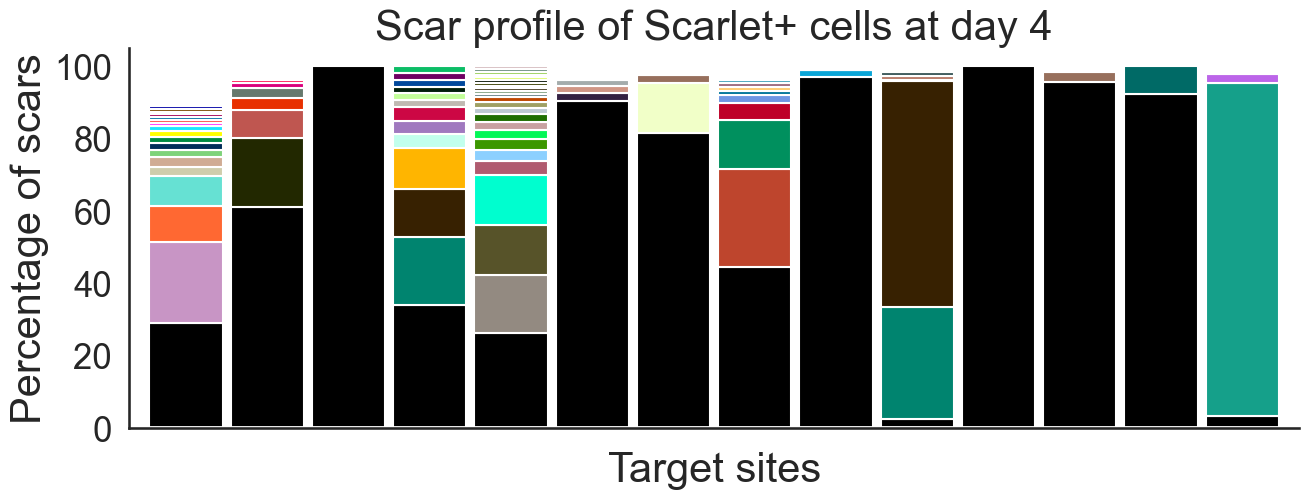

In [25]:
sns.set_style('white')
sns.set_context("talk")
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
fontsize = 30
ax = pd.DataFrame(allSites4).plot.bar(stacked=True,figsize=(15,5),fontsize = 25,width=0.90, color=cols)
ax.set_xlabel("Target sites",fontsize=fontsize)
ax.set_title('Scar profile of Scarlet+ cells at day 4', fontsize=fontsize)
ax.set_ylabel("Percentage of scars",fontsize=fontsize)
ax.tick_params(axis='x', rotation=90)
ax.set_xticklabels("")
sns.despine()
sns.set_style('white')
sns.set_context("talk")
#'ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([],frameon=False)

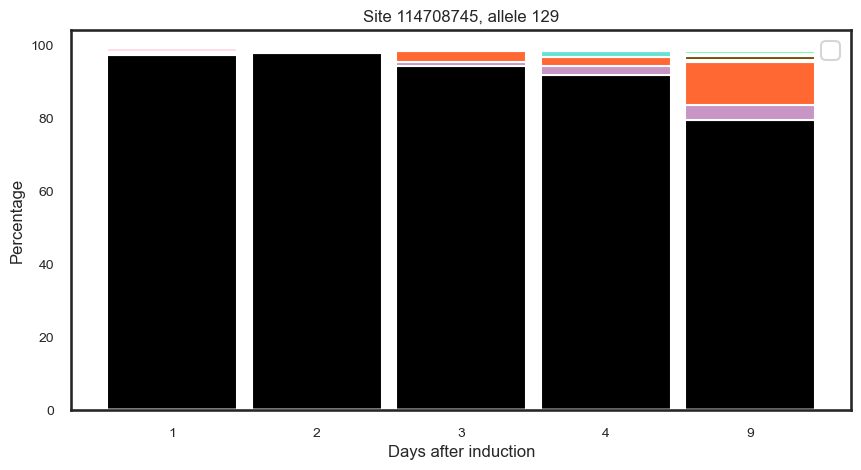

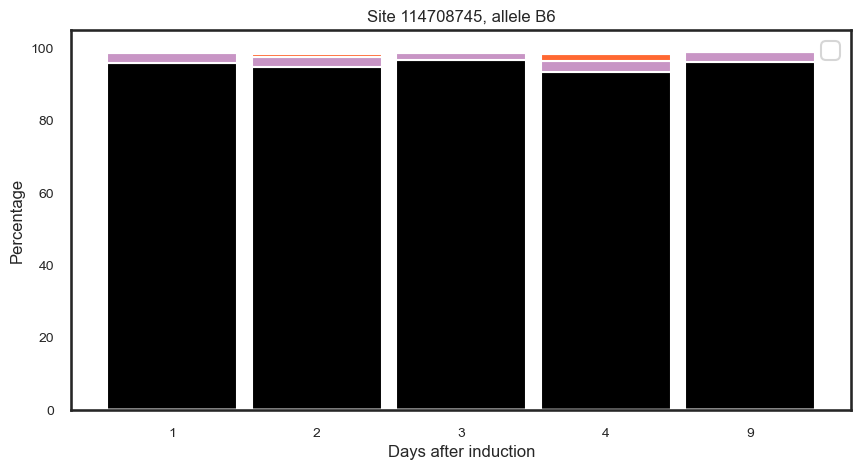

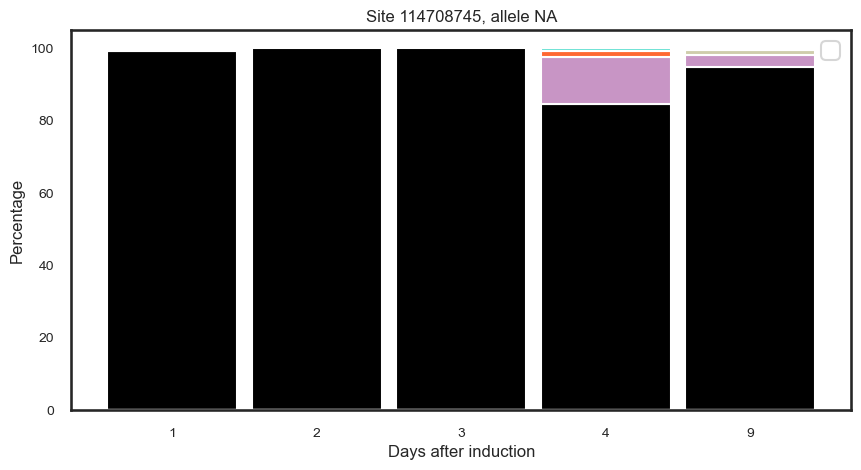

In [26]:
order = [5,4,3,0,6]
#plotting percentages 129
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114708745].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)
orderedpercentagepersite129pd = percentagepersite129pd.iloc[order]


ax = orderedpercentagepersite129pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 10,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=12)
ax.set_title('Site 114708745, allele 129', fontsize=12)
ax.set_ylabel("Percentage",fontsize=12)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([])

#plotting percentages B6
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114708745].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)
orderedpercentagepersiteB6pd = percentagepersiteB6pd.iloc[order]


ax = orderedpercentagepersiteB6pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 10,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=12)
ax.set_title('Site 114708745, allele B6', fontsize=12)
ax.set_ylabel("Percentage",fontsize=12)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([])


#plotting percentages NA
percentagepersiteNA = []
for cell in percentagesChr12_NA:
    percentagepersiteNA.append(percentagesChr12_NA[cell][114708745].dropna())

percentagepersiteNApd = pd.DataFrame(percentagepersiteNA)
orderedpercentagepersiteNApd = percentagepersiteNApd.iloc[order]

ax = orderedpercentagepersiteNApd.plot.bar(stacked=True,figsize=(10,5),fontsize = 10,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=12)
ax.set_title('Site 114708745, allele NA', fontsize=12)
ax.set_ylabel("Percentage",fontsize=12)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([])

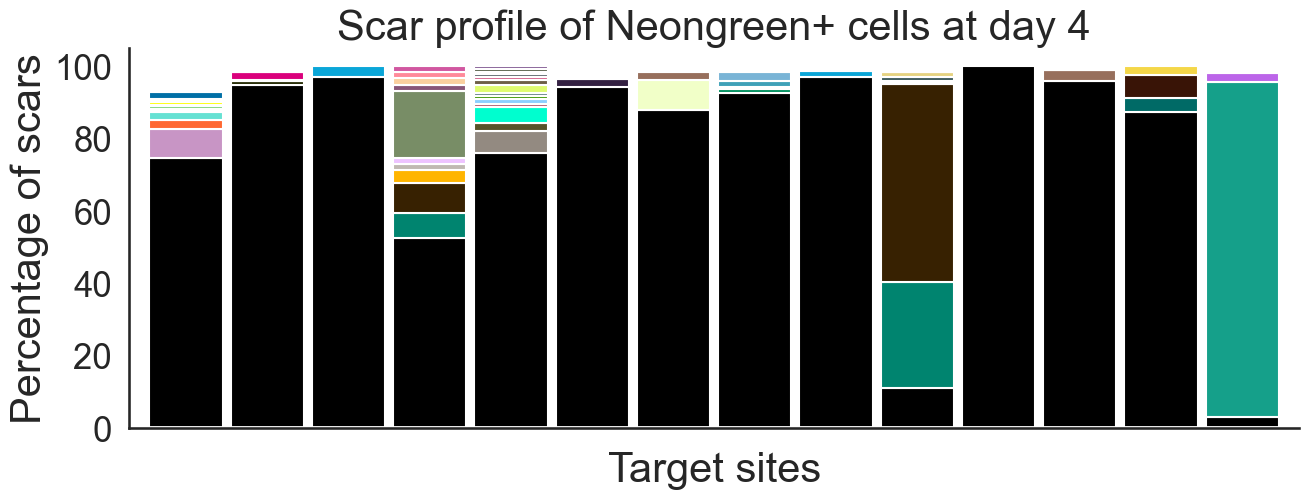

In [27]:
#allSites4ng = allSites4ng.loc[index]
sns.set_style('white')
sns.set_context("talk")
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
fontsize = 30
ax = pd.DataFrame(allSites4ng).plot.bar(stacked=True,figsize=(15,5),fontsize = 25,width=0.90, color=cols)
ax.set_xlabel("Target sites",fontsize=fontsize)
ax.set_title('Scar profile of Neongreen+ cells at day 4', fontsize=fontsize)
ax.set_ylabel("Percentage of scars",fontsize=fontsize)
ax.tick_params(axis='x', rotation=90)
ax.set_xticklabels("")
sns.despine()
sns.set_style('white')
sns.set_context("talk")
#'ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([],frameon=False)

In [28]:
allSitesPerSample = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))

dict2 = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))
for sample in selectedpercentagesChr12_129.columns:
    for site, scar in selectedpercentagesChr12_129[sample].index:
        allSitesPerSample[scar][('129', site)] = percentagesChr12_129[sample].loc[(site,scar)]
    for site, scar in selectedpercentagesChr12_B6[sample].index:
        allSitesPerSample[scar][('B6', site)] = percentagesChr12_B6[sample].loc[(site,scar)]

    allSitesPerSample = pd.DataFrame(allSitesPerSample)
    allSitesPerSample = allSitesPerSample[allSitesPerSample.sum(axis=1) > 0]
    #collapsed = pd.DataFrame((allSitesPerSample/len(allSitesPerSample)).sum(axis=0)).T.rename(index = {0:sample})
    dict2[sample] = (allSitesPerSample/len(allSitesPerSample)).sum(axis=0)
    collapsed = pd.DataFrame(dict2)
    print(sample)

4
4Neg
4NG
3
2
1
9


In [29]:
cols=['black',"#C895C5", #"#320033",
      "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#006FA6", "#A30059","#FFDBE5",
 "#75797C", "#837393", "#943A4D", "#B5F4FF", "#D2DCD5", "#9556BD", "#6A714A", "#001325", "#02525F", "#0AA3F7", "#E98176","#DBD5DD", "#5EBCD1", "#3D4F44", "#7E6405", "#02684E", "#962B75", "#8D8546", "#9695C5", "#E773CE", "#D86A78", "#3E89BE", "#CA834E", "#518A87", "#5B113C", "#55813B", "#E704C4", "#00005F", "#A97399", "#4B8160", "#59738A", "#FF5DA7", "#F7C9BF", "#643127", "#513A01","#83AB58", "#001C1E", "#D1F7CE", "#004B28", "#C8D0F6", "#A3A489", "#806C66", "#222800","#BF5650", "#E83000", "#66796D", "#DA007C", "#FF1A59", "#8ADBB4", "#1E0200", "#5B4E51","#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700","#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329","#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C","#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F","#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09","#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66","#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00","#BDC9D2", "#9FA064", "#BE4700", "#658188", "#83A485", "#453C23", "#47675D", "#3A3F00","#061203", "#DFFB71", "#868E7E", "#98D058", "#6C8F7D", "#D7BFC2", "#3C3E6E", "#D83D66","#2F5D9B", "#6C5E46", "#D25B88", "#5B656C", "#00B57F", "#545C46", "#866097", "#365D25","#252F99", "#00CCFF", "#674E60", "#FC009C", "#92896B", "#1E2324", "#DEC9B2", "#9D4948","#85ABB4", "#342142", "#D09685", "#A4ACAC", "#00FFFF", "#AE9C86", "#742A33", "#0E72C5","#AFD8EC", "#C064B9", "#91028C", "#FEEDBF", "#FFB789", "#9CB8E4", "#AFFFD1", "#2A364C","#4F4A43", "#647095", "#34BBFF", "#807781", "#920003", "#B3A5A7", "#018615", "#F1FFC8","#976F5C", "#FF3BC1", "#FF5F6B", "#077D84", "#F56D93", "#5771DA", "#4E1E2A", "#830055","#02D346", "#BE452D", "#00905E", "#BE0028", "#6E96E3", "#007699", "#FEC96D", "#9C6A7D","#3FA1B8", "#893DE3", "#79B4D6", "#7FD4D9", "#6751BB", "#B28D2D", "#E27A05", "#DD9CB8","#AABC7A", "#980034", "#561A02", "#8F7F00", "#635000", "#CD7DAE", "#8A5E2D", "#FFB3E1","#6B6466", "#C6D300", "#0100E2", "#88EC69", "#8FCCBE", "#21001C", "#511F4D", "#E3F6E3","#FF8EB1", "#6B4F29", "#A37F46", "#6A5950", "#1F2A1A", "#04784D", "#101835", "#E6E0D0","#FF74FE", "#00A45F", "#8F5DF8", "#4B0059", "#412F23", "#D8939E", "#DB9D72", "#604143","#B5BACE", "#989EB7", "#D2C4DB", "#A587AF", "#77D796", "#7F8C94", "#FF9B03", "#555196","#31DDAE", "#74B671", "#802647", "#2A373F", "#014A68", "#696628", "#4C7B6D", "#002C27","#7A4522", "#3B5859", "#E5D381", "#FFF3FF", "#679FA0", "#261300", "#2C5742", "#9131AF","#AF5D88", "#C7706A", "#61AB1F", "#8CF2D4", "#C5D9B8", "#9FFFFB", "#BF45CC", "#493941","#863B60", "#B90076", "#003177", "#C582D2", "#C1B394", "#602B70", "#887868", "#BABFB0","#030012", "#D1ACFE", "#7FDEFE", "#4B5C71", "#A3A097", "#E66D53", "#637B5D", "#92BEA5","#6B94AA", "#51A058", "#A45B02", "#1D1702", "#E20027", "#E7AB63", "#4C6001", "#9C6966","#64547B", "#97979E", "#006A66", "#391406", "#F4D749", "#0045D2", "#006C31", "#DDB6D0","#7C6571", "#9FB2A4", "#00D891", "#15A08A", "#BC65E9", "#FFFFFE", "#C6DC99", "#203B3C","#671190", "#6B3A64", "#F5E1FF", "#FFA0F2", "#CCAA35", "#374527", "#8BB400", "#797868","#C6005A", "#3B000A", "#C86240", "#29607C", "#402334", "#7D5A44", "#CCB87C", "#B88183","#AA5199", "#B5D6C3", "#A38469", "#9F94F0", "#A74571", "#B894A6", "#71BB8C", "#00B433","#789EC9", "#6D80BA", "#953F00", "#5EFF03", "#E4FFFC", "#1BE177", "#BCB1E5", "#76912F","#003109", "#0060CD", "#D20096", "#895563", "#29201D", "#5B3213", "#A76F42", "#89412E","#1A3A2A", "#494B5A", "#A88C85", "#F4ABAA", "#A3F3AB", "#00C6C8", "#EA8B66", "#958A9F", "#00F8B3", "#BEDDFF", "#3DB5A7", "#DD3248", "#B6E4DE", "#427745", "#598C5A", "#B94C59","#8181D5", "#94888B", "#FED6BD", "#536D31", "#6EFF92", "#E4E8FF", "#20E200", "#FFD0F2","#4C83A1", "#BD7322", "#915C4E", "#8C4787", "#025117", "#A2AA45", "#2D1B21", "#A9DDB0","#FF4F78", "#528500", "#009A2E", "#17FCE4", "#71555A", "#525D82", "#00195A", "#967874","#555558", "#0B212C", "#1E202B", "#EFBFC4", "#6F9755", "#6F7586", "#501D1D", "#372D00","#741D16", "#5EB393", "#B5B400", "#DD4A38", "#363DFF", "#AD6552", "#6635AF", "#836BBA","#98AA7F", "#464836", "#322C3E", "#7CB9BA", "#5B6965", "#707D3D", "#7A001D", "#6E4636","#443A38", "#AE81FF", "#489079", "#897334", "#009087", "#DA713C", "#361618", "#FF6F01","#006679", "#370E77", "#4B3A83", "#C9E2E6", "#C44170", "#FF4526", "#73BE54", "#C4DF72","#ADFF60", "#00447D", "#DCCEC9", "#BD9479", "#656E5B", "#EC5200", "#FF6EC2", "#7A617E","#DDAEA2", "#77837F", "#A53327", "#608EFF", "#B599D7", "#A50149", "#4E0025", "#C9B1A9","#03919A", "#1B2A25", "#E500F1", "#982E0B", "#B67180", "#E05859", "#006039", "#578F9B","#305230", "#CE934C", "#B3C2BE", "#C0BAC0", "#B506D3", "#170C10", "#4C534F", "#224451","#3E4141", "#78726D", "#B6602B", "#200441", "#DDB588", "#497200", "#C5AAB6", "#033C61","#71B2F5", "#A9E088", "#4979B0", "#A2C3DF", "#784149", "#2D2B17", "#3E0E2F", "#57344C","#0091BE", "#E451D1", "#4B4B6A", "#5C011A", "#7C8060", "#FF9491", "#4C325D", "#005C8B","#E5FDA4", "#68D1B6", "#032641", "#140023", "#8683A9", "#CFFF00", "#A72C3E", "#34475A","#B1BB9A", "#B4A04F", "#8D918E", "#A168A6", "#813D3A", "#425218", "#DA8386", "#776133","#563930", "#8498AE", "#90C1D3", "#B5666B", "#9B585E", "#856465", "#AD7C90", "#E2BC00","#E3AAE0", "#B2C2FE", "#FD0039", "#009B75", "#FFF46D", "#E87EAC", "#DFE3E6", "#848590","#AA9297", "#83A193", "#577977", "#3E7158", "#C64289", "#EA0072", "#C4A8CB", "#55C899","#E78FCF", "#004547", "#F6E2E3", "#966716", "#378FDB", "#435E6A", "#DA0004", "#1B000F","#5B9C8F", "#6E2B52", "#011115", "#E3E8C4", "#AE3B85", "#EA1CA9", "#FF9E6B", "#457D8B","#92678B", "#00CDBB", "#9CCC04", "#002E38", "#96C57F", "#CFF6B4", "#492818", "#766E52","#20370E", "#E3D19F", "#2E3C30", "#B2EACE", "#F3BDA4", "#A24E3D", "#976FD9", "#8C9FA8","#7C2B73", "#4E5F37", "#5D5462", "#90956F", "#6AA776", "#DBCBF6", "#DA71FF", "#987C95","#52323C", "#BB3C42", "#584D39", "#4FC15F", "#A2B9C1", "#79DB21", "#1D5958", "#BD744E","#160B00", "#20221A", "#6B8295", "#00E0E4", "#102401", "#1B782A", "#DAA9B5", "#B0415D","#859253", "#97A094", "#06E3C4", "#47688C", "#7C6755", "#075C00", "#7560D5", "#7D9F00","#C36D96", "#4D913E", "#5F4276", "#FCE4C8", "#303052", "#4F381B", "#E5A532", "#706690","#AA9A92", "#237363", "#73013E", "#FF9079", "#A79A74", "#029BDB", "#FF0169", "#C7D2E7","#CA8869", "#80FFCD", "#BB1F69", "#90B0AB", "#7D74A9", "#FCC7DB", "#99375B", "#00AB4D","#ABAED1", "#BE9D91", "#E6E5A7", "#332C22", "#DD587B", "#F5FFF7", "#5D3033", "#6D3800","#FF0020", "#B57BB3", "#D7FFE6", "#C535A9", "#260009", "#6A8781", "#A8ABB4", "#D45262","#794B61", "#4621B2", "#8DA4DB", "#C7C890", "#6FE9AD", "#A243A7", "#B2B081", "#181B00","#286154", "#4CA43B", "#6A9573", "#A8441D", "#5C727B", "#738671", "#D0CFCB", "#897B77","#1F3F22", "#4145A7", "#DA9894", "#A1757A", "#63243C", "#ADAAFF", "#00CDE2", "#DDBC62","#698EB1", "#208462", "#00B7E0", "#614A44", "#9BBB57", "#7A5C54", "#857A50", "#766B7E","#014833", "#FF8347", "#7A8EBA", "#274740", "#946444", "#EBD8E6", "#646241", "#373917","#6AD450", "#81817B", "#D499E3", "#979440", "#011A12", "#526554", "#B5885C", "#A499A5","#03AD89", "#B3008B", "#E3C4B5", "#96531F", "#867175", "#74569E", "#617D9F", "#E70452","#067EAF", "#A697B6", "#B787A8", "#9CFF93", "#311D19", "#3A9459", "#6E746E", "#B0C5AE","#84EDF7", "#ED3488", "#754C78", "#384644", "#C7847B", "#00B6C5", "#7FA670", "#C1AF9E","#2A7FFF", "#72A58C", "#FFC07F", "#9DEBDD", "#D97C8E", "#7E7C93", "#62E674", "#B5639E","#FFA861", "#C2A580", "#8D9C83", "#B70546", "#372B2E", "#0098FF", "#985975", "#20204C","#FF6C60", "#445083", "#8502AA", "#72361F", "#9676A3", "#484449", "#CED6C2", "#3B164A","#CCA763", "#2C7F77", "#02227B", "#A37E6F", "#CDE6DC", "#CDFFFB", "#BE811A", "#F77183","#EDE6E2", "#CDC6B4", "#FFE09E", "#3A7271", "#FF7B59", "#4E4E01", "#4AC684", "#8BC891","#BC8A96", "#CF6353", "#DCDE5C", "#5EAADD", "#F6A0AD", "#E269AA", "#A3DAE4", "#436E83","#002E17", "#ECFBFF", "#A1C2B6", "#50003F", "#71695B", "#67C4BB", "#536EFF", "#5D5A48","#890039", "#969381", "#371521", "#5E4665", "#AA62C3", "#8D6F81", "#2C6135", "#410601","#564620", "#E69034", "#6DA6BD", "#E58E56", "#E3A68B", "#48B176", "#D27D67", "#B5B268","#7F8427", "#FF84E6", "#435740", "#EAE408", "#F4F5FF", "#325800", "#4B6BA5", "#ADCEFF","#9B8ACC", "#885138", "#5875C1", "#7E7311", "#FEA5CA", "#9F8B5B", "#A55B54", "#89006A","#AF756F", "#2A2000", "#7499A1", "#FFB550", "#00011E", "#D1511C", "#688151", "#BC908A","#78C8EB", "#8502FF", "#483D30", "#C42221", "#5EA7FF", "#785715", "#0CEA91", "#FFFAED","#B3AF9D", "#3E3D52", "#5A9BC2", "#9C2F90", "#8D5700", "#ADD79C", "#00768B", "#337D00","#C59700", "#3156DC", "#944575", "#ECFFDC", "#D24CB2", "#97703C", "#4C257F", "#9E0366","#88FFEC", "#B56481", "#396D2B", "#56735F", "#988376", "#9BB195", "#A9795C", "#E4C5D3","#9F4F67", "#1E2B39", "#664327", "#AFCE78", "#322EDF", "#86B487", "#C23000", "#ABE86B","#96656D", "#250E35", "#A60019", "#0080CF", "#CAEFFF", "#323F61", "#A449DC", "#6A9D3B","#FF5AE4", "#636A01", "#D16CDA", "#736060", "#FFBAAD", "#D369B4", "#FFDED6", "#6C6D74","#927D5E", "#845D70", "#5B62C1", "#2F4A36", "#E45F35", "#FF3B53", "#AC84DD", "#762988","#70EC98", "#408543", "#2C3533", "#2E182D", "#323925", "#19181B", "#2F2E2C", "#023C32","#9B9EE2", "#58AFAD", "#5C424D", "#7AC5A6", "#685D75", "#B9BCBD", "#834357", "#1A7B42","#2E57AA", "#E55199", "#316E47", "#CD00C5", "#6A004D", "#7FBBEC", "#F35691", "#D7C54A","#62ACB7", "#CBA1BC", "#A28A9A", "#6C3F3B", "#FFE47D", "#DCBAE3", "#5F816D", "#3A404A","#7DBF32", "#E6ECDC", "#852C19", "#285366", "#B8CB9C", "#0E0D00", "#4B5D56", "#6B543F","#E27172", "#0568EC", "#2EB500", "#D21656", "#EFAFFF", "#682021", "#2D2011", "#DA4CFF","#70968E", "#FF7B7D", "#4A1930", "#E8C282", "#E7DBBC", "#A68486", "#1F263C", "#36574E","#52CE79", "#ADAAA9", "#8A9F45", "#6542D2", "#00FB8C", "#5D697B", "#CCD27F", "#94A5A1","#790229", "#E383E6", "#7EA4C1", "#4E4452", "#4B2C00", "#620B70", "#314C1E", "#874AA6","#E30091", "#66460A", "#EB9A8B", "#EAC3A3", "#98EAB3", "#AB9180", "#B8552F", "#1A2B2F","#94DDC5", "#9D8C76", "#9C8333", "#94A9C9", "#392935", "#8C675E", "#CCE93A", "#917100","#01400B", "#449896", "#1CA370", "#E08DA7", "#8B4A4E", "#667776", "#4692AD", "#67BDA8","#69255C", "#D3BFFF", "#4A5132", "#7E9285", "#77733C", "#E7A0CC", "#51A288", "#2C656A","#4D5C5E", "#C9403A", "#DDD7F3", "#005844", "#B4A200", "#488F69", "#858182", "#D4E9B9","#3D7397", "#CAE8CE", "#D60034", "#AA6746", "#9E5585", "#BA6200"]

def plotAllSamples(df, title = 'Scar profile', x = 'Days after induction'):
    sns.set_style('white')
    sns.set_context("talk")
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    mpl.rcParams['font.family'] = 'Arial'
    fontsize = 30
    ax = df.plot.bar(stacked=True,figsize=(15,5),fontsize = 25,width=0.90, color=cols)
    ax.set_xlabel(x,fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)
    ax.set_ylabel("Percentage of scars",fontsize=fontsize)
    #ax.tick_params(axis='x', rotation=45)
    #ax.set_xticklabels("")
    #ax.set_xticklabels(rotation=45, ha='right')
    ax.tick_params(axis = 'x',rotation=0)
    #plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
    ax.set_ylim([0,100])
    sns.despine()
    sns.set_style('ticks')
    sns.set_context("talk")
    #'ax.legend(bbox_to_anchor=(0.9,-0.1))
    ax.legend([],frameon=False)

In [30]:
percentagepersitepd = collapsed.T.reindex(['1','2','3','4NG','4Neg','4','9'])
percentagepersitepd = percentagepersitepd

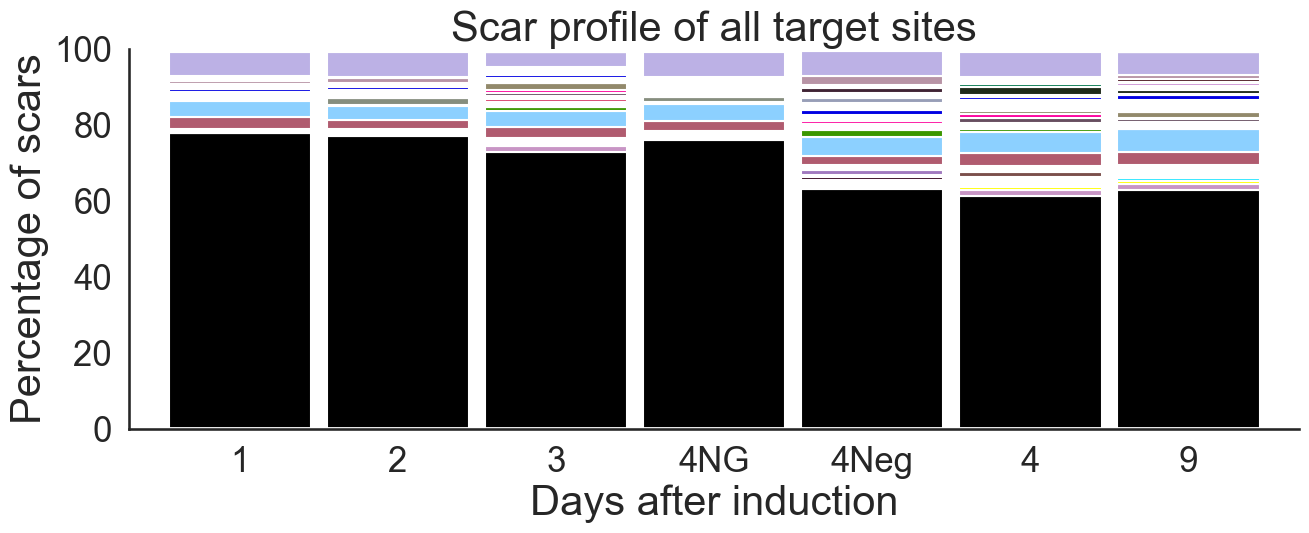

In [31]:
plotAllSamples(percentagepersitepd, title = 'Scar profile of all target sites')

In [32]:
q_df = pd.DataFrame(dict2)

In [33]:
newdict = {}
q_df_noWT = q_df.drop(['WT'], axis = 0)
for sample in q_df_noWT:
    newdict[sample] = len(q_df_noWT[q_df_noWT[sample] >= 0.5])
uniqueScars = pd.DataFrame(list(newdict.items()),columns = ['full_sample','uniqueScars'])

lineplot_df = pd.DataFrame(q_df.loc['WT']).reset_index().rename(columns={'index': 'full_sample'})
lineplot_df = lineplot_df.rename(columns={'WT':'Percentage'})
lineplot_df['Sample'] = ['Scarlet','Negative','Neongreen','Scarlet','Scarlet','Scarlet','Scarlet']
lineplot_scars = lineplot_df.copy()
lineplot_scars['Percentage'] = 100 - lineplot_scars['Percentage']
lineplot_scars['Type'] = 'Scar'
lineplot_df['Type'] = 'WT'
lineplot_df = pd.concat([lineplot_df, lineplot_scars])
lineplot_df = pd.merge(lineplot_df, uniqueScars, left_on='full_sample', right_on='full_sample')
lineplot_df['Day'] = lineplot_df['full_sample'].str[:1].astype(np.int64)


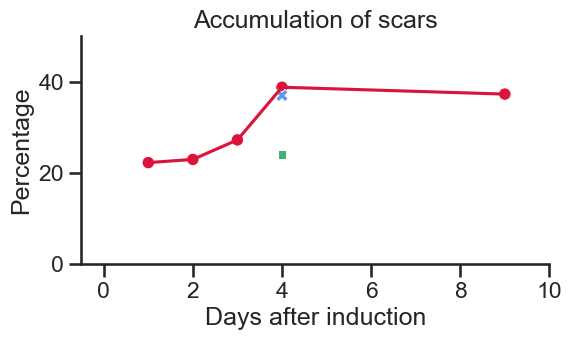

In [34]:
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(6,3), dpi = dpi)

cols = {'Scarlet':'crimson','Neongreen':'mediumseagreen', 'Negative':'cornflowerblue'}
lineplot_df_s = lineplot_df[lineplot_df['Type'] == 'Scar']

sns.scatterplot(x = lineplot_df_s['Day'], 
                y = lineplot_df_s['Percentage'], ax=ax, 
                hue = lineplot_df_s['Sample'],
                style = lineplot_df_s['Sample'], 
           palette = cols)
sns.lineplot(x = 'Day', y = 'Percentage', ax=ax, 
             data = lineplot_df_s[lineplot_df_s['Sample'] == 'Scarlet'],
                #hue = lineplot_df_s['Sample'],
           color = 'crimson')

 
ax.set_xlim(-0.5,10)
ax.set_ylim(0,50)
ax.set_ylabel("Percentage")
ax.set_xlabel("Days after induction")
ax.set_title("Accumulation of scars")
ax.legend([], frameon=False)
#ax.legend(loc = 'upper right')
sns.despine()

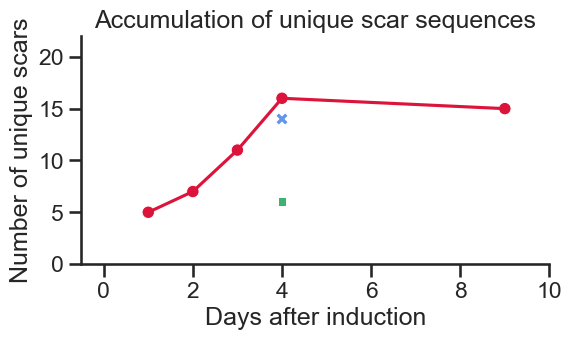

In [35]:
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(6,3), dpi = dpi)

cols = {'Scarlet':'crimson','Neongreen':'mediumseagreen', 'Negative':'cornflowerblue'}

lineplot_df_s = lineplot_df[lineplot_df['Type'] == 'Scar']

sns.scatterplot(x = lineplot_df_s['Day'], 
                y = lineplot_df_s['uniqueScars'], ax=ax, 
                hue = lineplot_df_s['Sample'],
                style = lineplot_df_s['Sample'], 
           palette = cols)
sns.lineplot(x = lineplot_df_s['Day'], 
                y = lineplot_df_s['uniqueScars'], ax=ax, 
             data = lineplot_df_s[lineplot_df_s['Sample'] == 'Scarlet'],
                hue = lineplot_df_s['Sample'],
           palette = cols)

 
ax.set_xlim(-0.5,10)
ax.set_ylim(0,22)
ax.set_xticks(np.arange(0, 10.2,2))
ax.set_yticks(np.arange(0, 22,5))
ax.set_ylabel("Number of unique scars")
ax.set_xlabel("Days after induction")
ax.set_title("Accumulation of unique scar sequences")
ax.legend([], frameon=False)
#ax.legend(loc = 'upper right')
sns.despine()

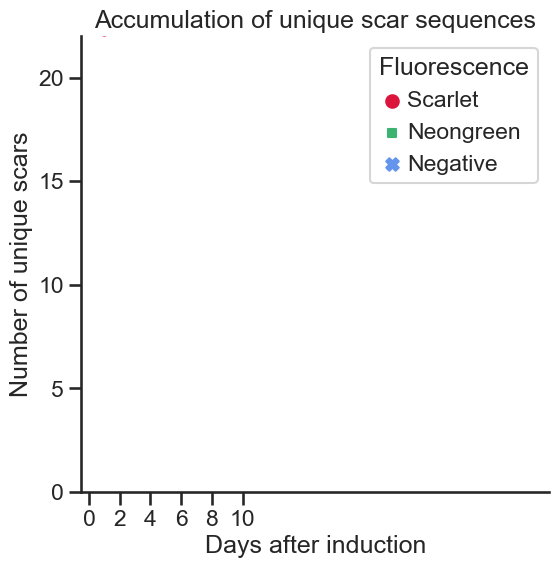

In [36]:
# for legend
sns.set_context("talk")

fig, ax = plt.subplots(figsize=(6,6), dpi = dpi)

cols = {'Scarlet':'crimson','Neongreen':'mediumseagreen', 'Negative':'cornflowerblue'}

lineplot_df_s = lineplot_df[lineplot_df['Type'] == 'Scar']

sns.scatterplot(x = lineplot_df_s['Day'], 
                y = lineplot_df_s['Percentage'], ax=ax, 
                hue = lineplot_df_s['Sample'],
                hue_order = ['Scarlet','Neongreen','Negative'],
                style = lineplot_df_s['Sample'], 
           palette = cols)
#sns.lineplot(x = lineplot_df_s['Day'], 
#                y = lineplot_df_s['uniqueScars'], ax=ax, 
#                hue = lineplot_df_s['Type'],
#           palette = cols)

 
ax.set_xlim(-0.5,30)
ax.set_ylim(0,22)
ax.set_xticks(np.arange(0, 10.2,2))
ax.set_yticks(np.arange(0, 22,5))
ax.set_ylabel("Number of unique scars")
ax.set_xlabel("Days after induction")
ax.set_title("Accumulation of unique scar sequences")
#ax.legend([], frameon=False)
ax.legend(loc = 'upper right', title = 'Fluorescence')
sns.despine()

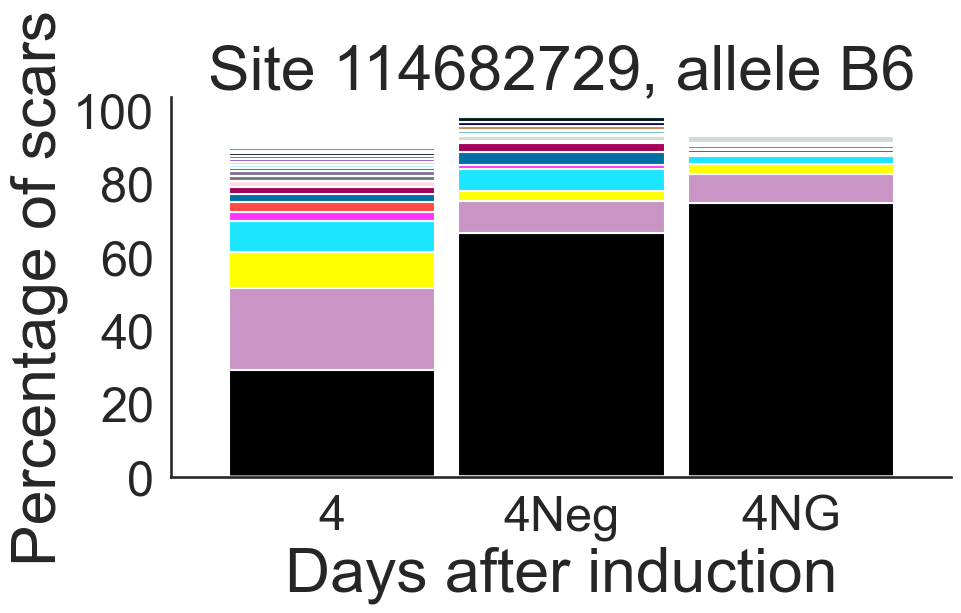

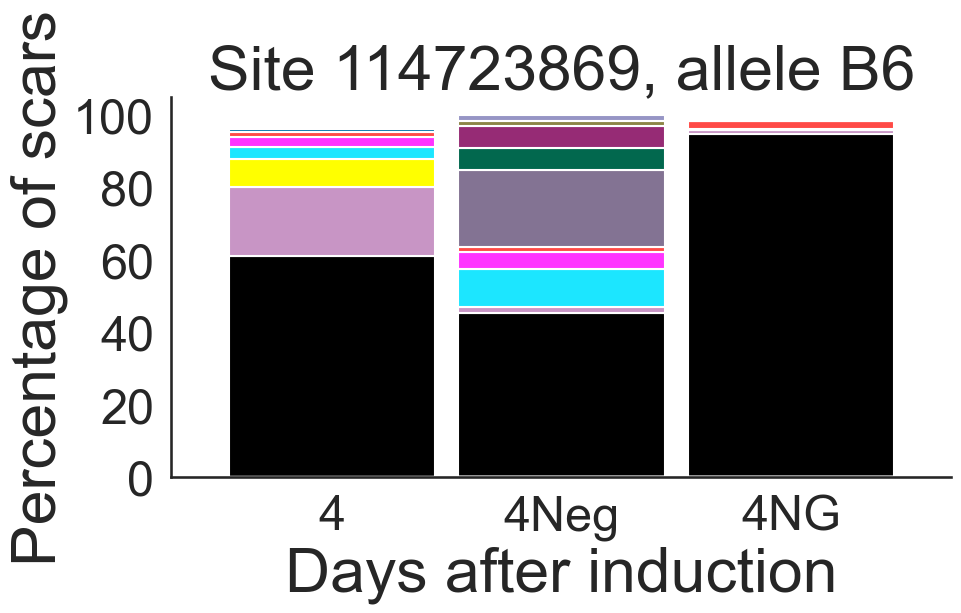

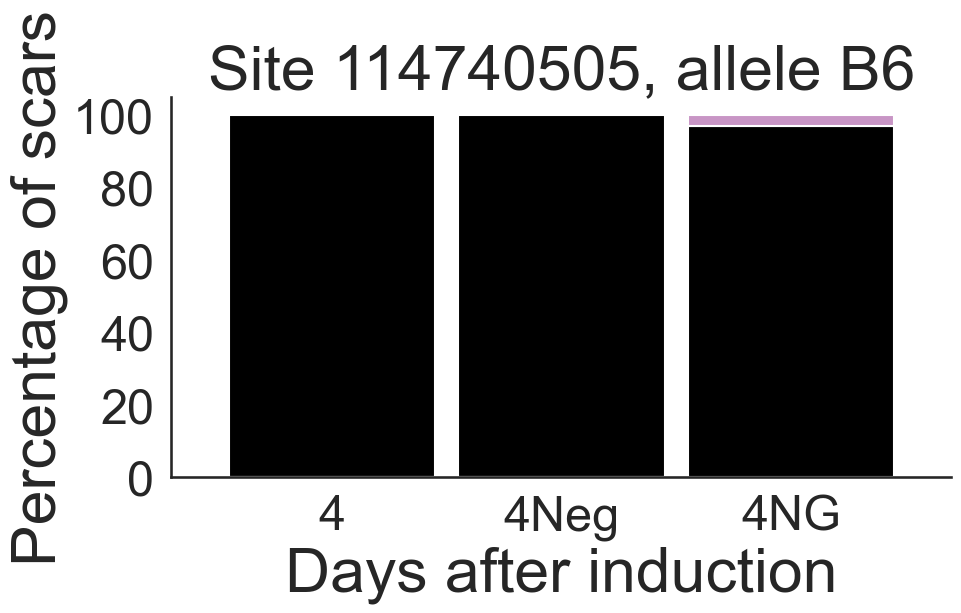

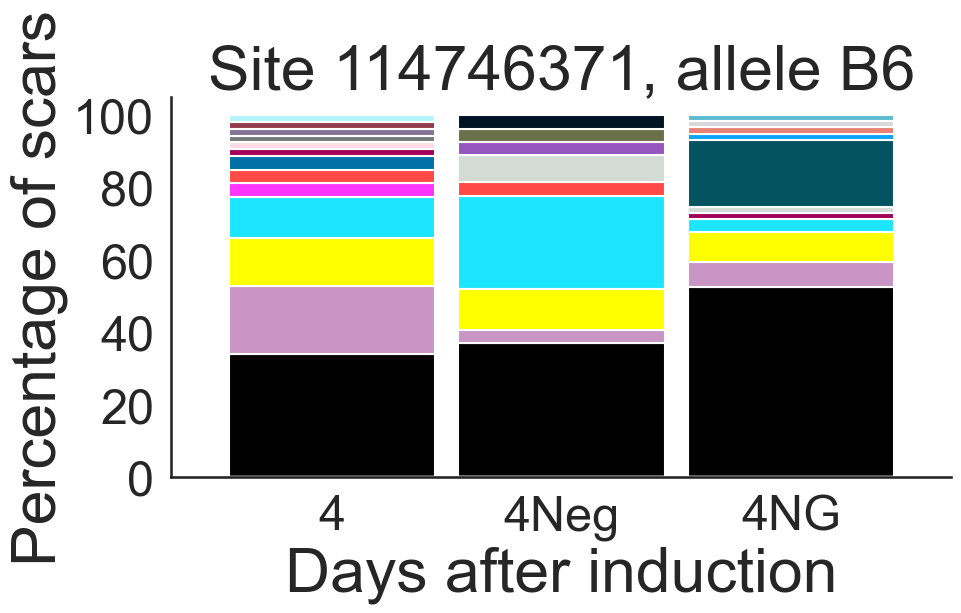

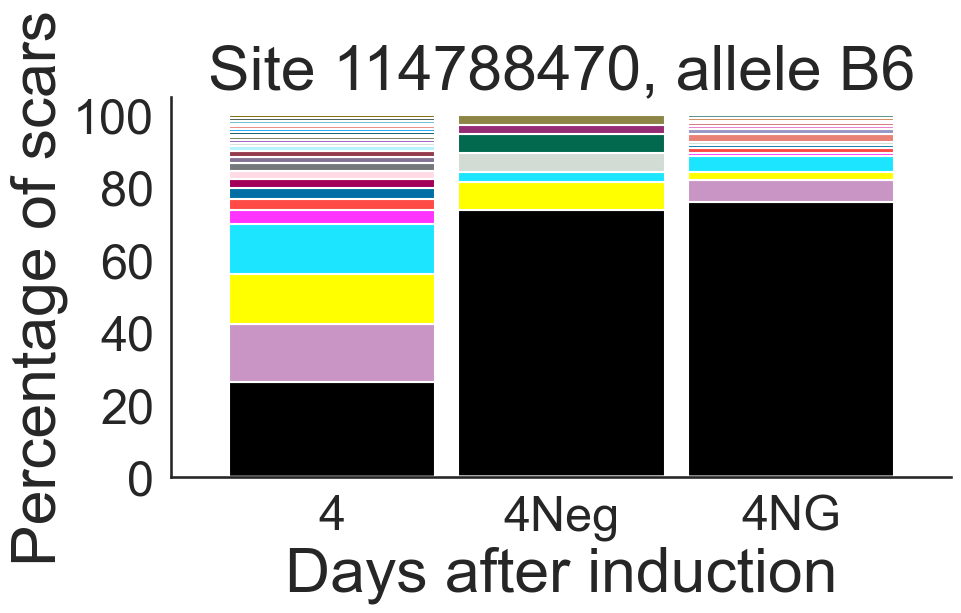

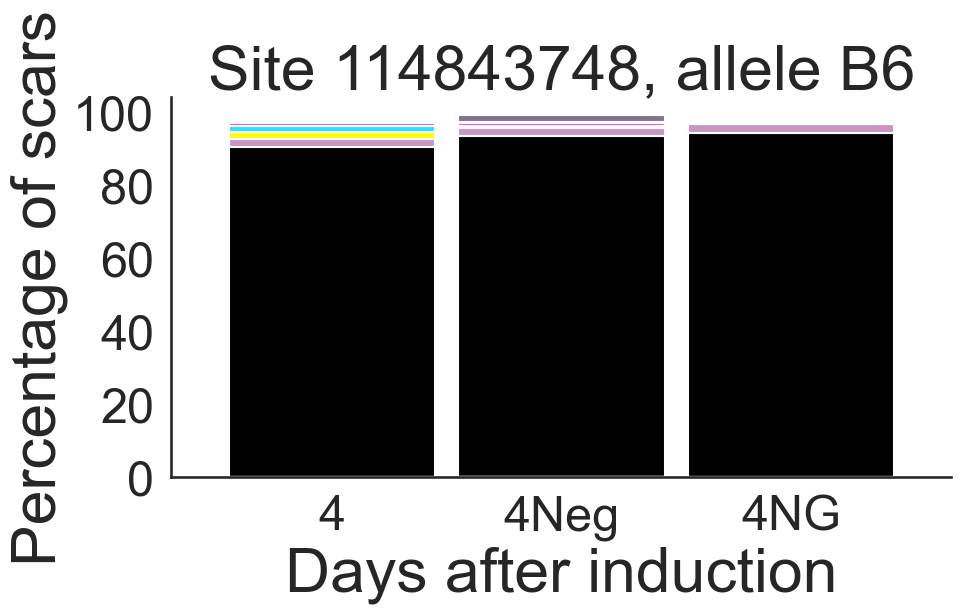

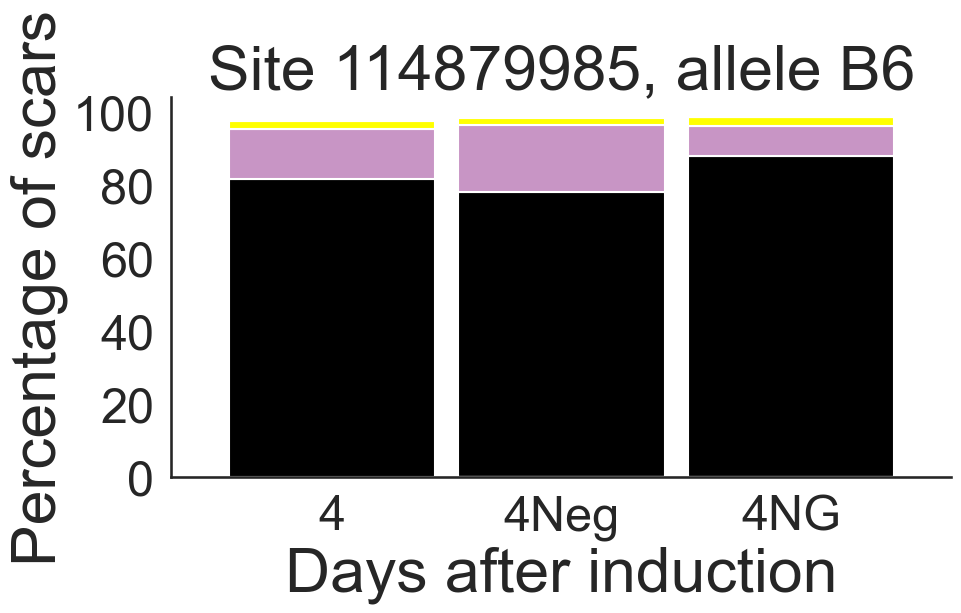

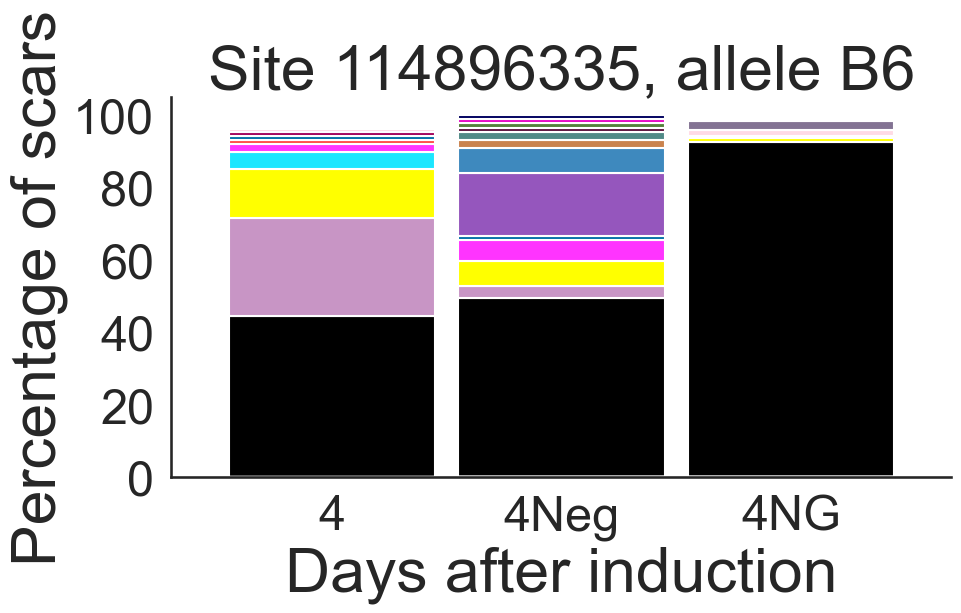

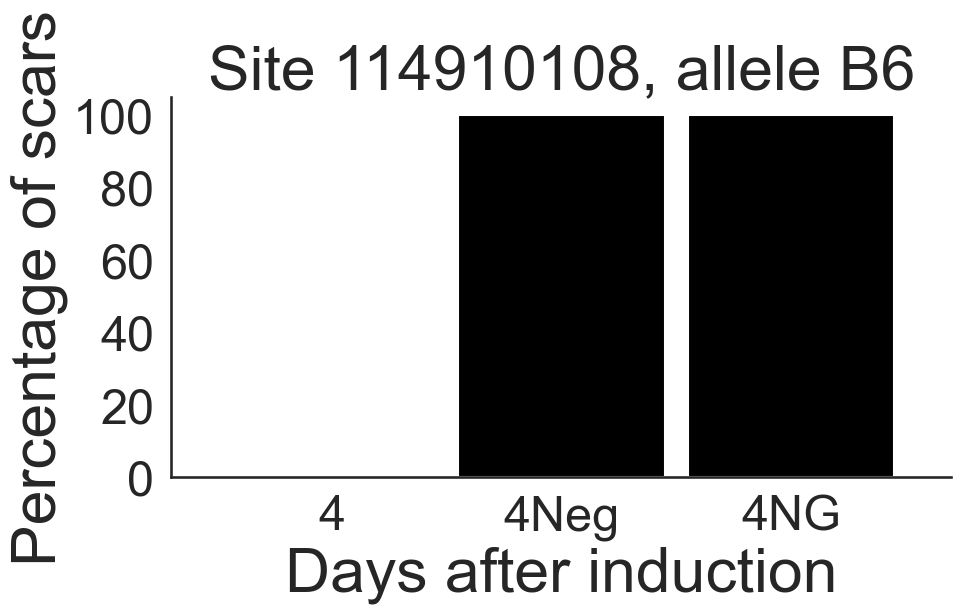

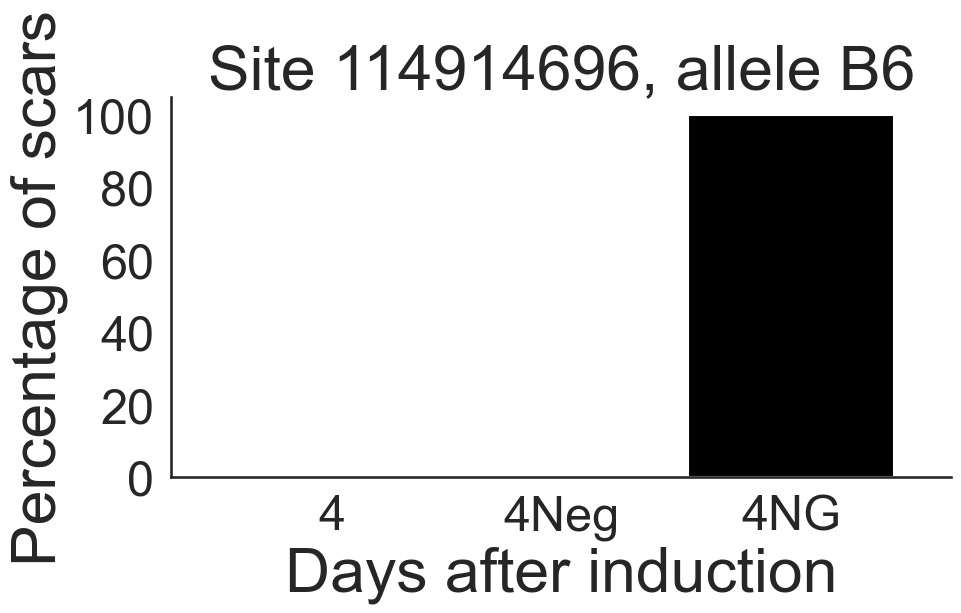

In [37]:
cols=['black',"#C895C5", #"#320033",
      "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#006FA6", "#A30059","#FFDBE5",
 "#75797C", "#837393", "#943A4D", "#B5F4FF", "#D2DCD5", "#9556BD", "#6A714A", "#001325", "#02525F", "#0AA3F7", "#E98176","#DBD5DD", "#5EBCD1", "#3D4F44", "#7E6405", "#02684E", "#962B75", "#8D8546", "#9695C5", "#E773CE", "#D86A78", "#3E89BE", "#CA834E", "#518A87", "#5B113C", "#55813B", "#E704C4", "#00005F", "#A97399", "#4B8160", "#59738A", "#FF5DA7", "#F7C9BF", "#643127", "#513A01","#83AB58", "#001C1E", "#D1F7CE", "#004B28", "#C8D0F6", "#A3A489", "#806C66", "#222800","#BF5650", "#E83000", "#66796D", "#DA007C", "#FF1A59", "#8ADBB4", "#1E0200", "#5B4E51","#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700","#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329","#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C","#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F","#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09","#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66","#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00","#BDC9D2", "#9FA064", "#BE4700", "#658188", "#83A485", "#453C23", "#47675D", "#3A3F00","#061203", "#DFFB71", "#868E7E", "#98D058", "#6C8F7D", "#D7BFC2", "#3C3E6E", "#D83D66","#2F5D9B", "#6C5E46", "#D25B88", "#5B656C", "#00B57F", "#545C46", "#866097", "#365D25","#252F99", "#00CCFF", "#674E60", "#FC009C", "#92896B", "#1E2324", "#DEC9B2", "#9D4948","#85ABB4", "#342142", "#D09685", "#A4ACAC", "#00FFFF", "#AE9C86", "#742A33", "#0E72C5","#AFD8EC", "#C064B9", "#91028C", "#FEEDBF", "#FFB789", "#9CB8E4", "#AFFFD1", "#2A364C","#4F4A43", "#647095", "#34BBFF", "#807781", "#920003", "#B3A5A7", "#018615", "#F1FFC8","#976F5C", "#FF3BC1", "#FF5F6B", "#077D84", "#F56D93", "#5771DA", "#4E1E2A", "#830055","#02D346", "#BE452D", "#00905E", "#BE0028", "#6E96E3", "#007699", "#FEC96D", "#9C6A7D","#3FA1B8", "#893DE3", "#79B4D6", "#7FD4D9", "#6751BB", "#B28D2D", "#E27A05", "#DD9CB8","#AABC7A", "#980034", "#561A02", "#8F7F00", "#635000", "#CD7DAE", "#8A5E2D", "#FFB3E1","#6B6466", "#C6D300", "#0100E2", "#88EC69", "#8FCCBE", "#21001C", "#511F4D", "#E3F6E3","#FF8EB1", "#6B4F29", "#A37F46", "#6A5950", "#1F2A1A", "#04784D", "#101835", "#E6E0D0","#FF74FE", "#00A45F", "#8F5DF8", "#4B0059", "#412F23", "#D8939E", "#DB9D72", "#604143","#B5BACE", "#989EB7", "#D2C4DB", "#A587AF", "#77D796", "#7F8C94", "#FF9B03", "#555196","#31DDAE", "#74B671", "#802647", "#2A373F", "#014A68", "#696628", "#4C7B6D", "#002C27","#7A4522", "#3B5859", "#E5D381", "#FFF3FF", "#679FA0", "#261300", "#2C5742", "#9131AF","#AF5D88", "#C7706A", "#61AB1F", "#8CF2D4", "#C5D9B8", "#9FFFFB", "#BF45CC", "#493941","#863B60", "#B90076", "#003177", "#C582D2", "#C1B394", "#602B70", "#887868", "#BABFB0","#030012", "#D1ACFE", "#7FDEFE", "#4B5C71", "#A3A097", "#E66D53", "#637B5D", "#92BEA5","#6B94AA", "#51A058", "#A45B02", "#1D1702", "#E20027", "#E7AB63", "#4C6001", "#9C6966","#64547B", "#97979E", "#006A66", "#391406", "#F4D749", "#0045D2", "#006C31", "#DDB6D0","#7C6571", "#9FB2A4", "#00D891", "#15A08A", "#BC65E9", "#FFFFFE", "#C6DC99", "#203B3C","#671190", "#6B3A64", "#F5E1FF", "#FFA0F2", "#CCAA35", "#374527", "#8BB400", "#797868","#C6005A", "#3B000A", "#C86240", "#29607C", "#402334", "#7D5A44", "#CCB87C", "#B88183","#AA5199", "#B5D6C3", "#A38469", "#9F94F0", "#A74571", "#B894A6", "#71BB8C", "#00B433","#789EC9", "#6D80BA", "#953F00", "#5EFF03", "#E4FFFC", "#1BE177", "#BCB1E5", "#76912F","#003109", "#0060CD", "#D20096", "#895563", "#29201D", "#5B3213", "#A76F42", "#89412E","#1A3A2A", "#494B5A", "#A88C85", "#F4ABAA", "#A3F3AB", "#00C6C8", "#EA8B66", "#958A9F", "#00F8B3", "#BEDDFF", "#3DB5A7", "#DD3248", "#B6E4DE", "#427745", "#598C5A", "#B94C59","#8181D5", "#94888B", "#FED6BD", "#536D31", "#6EFF92", "#E4E8FF", "#20E200", "#FFD0F2","#4C83A1", "#BD7322", "#915C4E", "#8C4787", "#025117", "#A2AA45", "#2D1B21", "#A9DDB0","#FF4F78", "#528500", "#009A2E", "#17FCE4", "#71555A", "#525D82", "#00195A", "#967874","#555558", "#0B212C", "#1E202B", "#EFBFC4", "#6F9755", "#6F7586", "#501D1D", "#372D00","#741D16", "#5EB393", "#B5B400", "#DD4A38", "#363DFF", "#AD6552", "#6635AF", "#836BBA","#98AA7F", "#464836", "#322C3E", "#7CB9BA", "#5B6965", "#707D3D", "#7A001D", "#6E4636","#443A38", "#AE81FF", "#489079", "#897334", "#009087", "#DA713C", "#361618", "#FF6F01","#006679", "#370E77", "#4B3A83", "#C9E2E6", "#C44170", "#FF4526", "#73BE54", "#C4DF72","#ADFF60", "#00447D", "#DCCEC9", "#BD9479", "#656E5B", "#EC5200", "#FF6EC2", "#7A617E","#DDAEA2", "#77837F", "#A53327", "#608EFF", "#B599D7", "#A50149", "#4E0025", "#C9B1A9","#03919A", "#1B2A25", "#E500F1", "#982E0B", "#B67180", "#E05859", "#006039", "#578F9B","#305230", "#CE934C", "#B3C2BE", "#C0BAC0", "#B506D3", "#170C10", "#4C534F", "#224451","#3E4141", "#78726D", "#B6602B", "#200441", "#DDB588", "#497200", "#C5AAB6", "#033C61","#71B2F5", "#A9E088", "#4979B0", "#A2C3DF", "#784149", "#2D2B17", "#3E0E2F", "#57344C","#0091BE", "#E451D1", "#4B4B6A", "#5C011A", "#7C8060", "#FF9491", "#4C325D", "#005C8B","#E5FDA4", "#68D1B6", "#032641", "#140023", "#8683A9", "#CFFF00", "#A72C3E", "#34475A","#B1BB9A", "#B4A04F", "#8D918E", "#A168A6", "#813D3A", "#425218", "#DA8386", "#776133","#563930", "#8498AE", "#90C1D3", "#B5666B", "#9B585E", "#856465", "#AD7C90", "#E2BC00","#E3AAE0", "#B2C2FE", "#FD0039", "#009B75", "#FFF46D", "#E87EAC", "#DFE3E6", "#848590","#AA9297", "#83A193", "#577977", "#3E7158", "#C64289", "#EA0072", "#C4A8CB", "#55C899","#E78FCF", "#004547", "#F6E2E3", "#966716", "#378FDB", "#435E6A", "#DA0004", "#1B000F","#5B9C8F", "#6E2B52", "#011115", "#E3E8C4", "#AE3B85", "#EA1CA9", "#FF9E6B", "#457D8B","#92678B", "#00CDBB", "#9CCC04", "#002E38", "#96C57F", "#CFF6B4", "#492818", "#766E52","#20370E", "#E3D19F", "#2E3C30", "#B2EACE", "#F3BDA4", "#A24E3D", "#976FD9", "#8C9FA8","#7C2B73", "#4E5F37", "#5D5462", "#90956F", "#6AA776", "#DBCBF6", "#DA71FF", "#987C95","#52323C", "#BB3C42", "#584D39", "#4FC15F", "#A2B9C1", "#79DB21", "#1D5958", "#BD744E","#160B00", "#20221A", "#6B8295", "#00E0E4", "#102401", "#1B782A", "#DAA9B5", "#B0415D","#859253", "#97A094", "#06E3C4", "#47688C", "#7C6755", "#075C00", "#7560D5", "#7D9F00","#C36D96", "#4D913E", "#5F4276", "#FCE4C8", "#303052", "#4F381B", "#E5A532", "#706690","#AA9A92", "#237363", "#73013E", "#FF9079", "#A79A74", "#029BDB", "#FF0169", "#C7D2E7","#CA8869", "#80FFCD", "#BB1F69", "#90B0AB", "#7D74A9", "#FCC7DB", "#99375B", "#00AB4D","#ABAED1", "#BE9D91", "#E6E5A7", "#332C22", "#DD587B", "#F5FFF7", "#5D3033", "#6D3800","#FF0020", "#B57BB3", "#D7FFE6", "#C535A9", "#260009", "#6A8781", "#A8ABB4", "#D45262","#794B61", "#4621B2", "#8DA4DB", "#C7C890", "#6FE9AD", "#A243A7", "#B2B081", "#181B00","#286154", "#4CA43B", "#6A9573", "#A8441D", "#5C727B", "#738671", "#D0CFCB", "#897B77","#1F3F22", "#4145A7", "#DA9894", "#A1757A", "#63243C", "#ADAAFF", "#00CDE2", "#DDBC62","#698EB1", "#208462", "#00B7E0", "#614A44", "#9BBB57", "#7A5C54", "#857A50", "#766B7E","#014833", "#FF8347", "#7A8EBA", "#274740", "#946444", "#EBD8E6", "#646241", "#373917","#6AD450", "#81817B", "#D499E3", "#979440", "#011A12", "#526554", "#B5885C", "#A499A5","#03AD89", "#B3008B", "#E3C4B5", "#96531F", "#867175", "#74569E", "#617D9F", "#E70452","#067EAF", "#A697B6", "#B787A8", "#9CFF93", "#311D19", "#3A9459", "#6E746E", "#B0C5AE","#84EDF7", "#ED3488", "#754C78", "#384644", "#C7847B", "#00B6C5", "#7FA670", "#C1AF9E","#2A7FFF", "#72A58C", "#FFC07F", "#9DEBDD", "#D97C8E", "#7E7C93", "#62E674", "#B5639E","#FFA861", "#C2A580", "#8D9C83", "#B70546", "#372B2E", "#0098FF", "#985975", "#20204C","#FF6C60", "#445083", "#8502AA", "#72361F", "#9676A3", "#484449", "#CED6C2", "#3B164A","#CCA763", "#2C7F77", "#02227B", "#A37E6F", "#CDE6DC", "#CDFFFB", "#BE811A", "#F77183","#EDE6E2", "#CDC6B4", "#FFE09E", "#3A7271", "#FF7B59", "#4E4E01", "#4AC684", "#8BC891","#BC8A96", "#CF6353", "#DCDE5C", "#5EAADD", "#F6A0AD", "#E269AA", "#A3DAE4", "#436E83","#002E17", "#ECFBFF", "#A1C2B6", "#50003F", "#71695B", "#67C4BB", "#536EFF", "#5D5A48","#890039", "#969381", "#371521", "#5E4665", "#AA62C3", "#8D6F81", "#2C6135", "#410601","#564620", "#E69034", "#6DA6BD", "#E58E56", "#E3A68B", "#48B176", "#D27D67", "#B5B268","#7F8427", "#FF84E6", "#435740", "#EAE408", "#F4F5FF", "#325800", "#4B6BA5", "#ADCEFF","#9B8ACC", "#885138", "#5875C1", "#7E7311", "#FEA5CA", "#9F8B5B", "#A55B54", "#89006A","#AF756F", "#2A2000", "#7499A1", "#FFB550", "#00011E", "#D1511C", "#688151", "#BC908A","#78C8EB", "#8502FF", "#483D30", "#C42221", "#5EA7FF", "#785715", "#0CEA91", "#FFFAED","#B3AF9D", "#3E3D52", "#5A9BC2", "#9C2F90", "#8D5700", "#ADD79C", "#00768B", "#337D00","#C59700", "#3156DC", "#944575", "#ECFFDC", "#D24CB2", "#97703C", "#4C257F", "#9E0366","#88FFEC", "#B56481", "#396D2B", "#56735F", "#988376", "#9BB195", "#A9795C", "#E4C5D3","#9F4F67", "#1E2B39", "#664327", "#AFCE78", "#322EDF", "#86B487", "#C23000", "#ABE86B","#96656D", "#250E35", "#A60019", "#0080CF", "#CAEFFF", "#323F61", "#A449DC", "#6A9D3B","#FF5AE4", "#636A01", "#D16CDA", "#736060", "#FFBAAD", "#D369B4", "#FFDED6", "#6C6D74","#927D5E", "#845D70", "#5B62C1", "#2F4A36", "#E45F35", "#FF3B53", "#AC84DD", "#762988","#70EC98", "#408543", "#2C3533", "#2E182D", "#323925", "#19181B", "#2F2E2C", "#023C32","#9B9EE2", "#58AFAD", "#5C424D", "#7AC5A6", "#685D75", "#B9BCBD", "#834357", "#1A7B42","#2E57AA", "#E55199", "#316E47", "#CD00C5", "#6A004D", "#7FBBEC", "#F35691", "#D7C54A","#62ACB7", "#CBA1BC", "#A28A9A", "#6C3F3B", "#FFE47D", "#DCBAE3", "#5F816D", "#3A404A","#7DBF32", "#E6ECDC", "#852C19", "#285366", "#B8CB9C", "#0E0D00", "#4B5D56", "#6B543F","#E27172", "#0568EC", "#2EB500", "#D21656", "#EFAFFF", "#682021", "#2D2011", "#DA4CFF","#70968E", "#FF7B7D", "#4A1930", "#E8C282", "#E7DBBC", "#A68486", "#1F263C", "#36574E","#52CE79", "#ADAAA9", "#8A9F45", "#6542D2", "#00FB8C", "#5D697B", "#CCD27F", "#94A5A1","#790229", "#E383E6", "#7EA4C1", "#4E4452", "#4B2C00", "#620B70", "#314C1E", "#874AA6","#E30091", "#66460A", "#EB9A8B", "#EAC3A3", "#98EAB3", "#AB9180", "#B8552F", "#1A2B2F","#94DDC5", "#9D8C76", "#9C8333", "#94A9C9", "#392935", "#8C675E", "#CCE93A", "#917100","#01400B", "#449896", "#1CA370", "#E08DA7", "#8B4A4E", "#667776", "#4692AD", "#67BDA8","#69255C", "#D3BFFF", "#4A5132", "#7E9285", "#77733C", "#E7A0CC", "#51A288", "#2C656A","#4D5C5E", "#C9403A", "#DDD7F3", "#005844", "#B4A200", "#488F69", "#858182", "#D4E9B9","#3D7397", "#CAE8CE", "#D60034", "#AA6746", "#9E5585", "#BA6200"]


df = percentagesChr12_129[['4', '4Neg','4NG']]

targetsites = [114682729, 14708745, 114723869, 114740505,114746371, 114788470, 114843748, 114851288,
          114879985,114896335,114910108,114914696,114736342]
for site in df.index.levels[0].unique():
    if site in targetsites:
        sns.set_style('white')
        sns.set_context("talk")
        mpl.rcParams['pdf.fonttype'] = 42
        mpl.rcParams['ps.fonttype'] = 42
        mpl.rcParams['font.family'] = 'Arial'
        fontsize = 45
        #plotting percentages 129
        percentagepersiteB6 = []
        for cell in df:
            percentagepersiteB6.append(df[cell][site].dropna())

        percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)
        orderedpercentagepersiteB6pd = percentagepersiteB6pd#.iloc[order]


        ax = orderedpercentagepersiteB6pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 35,
                                                   width=0.90, 
                                                   color=cols)
        ax.set_xlabel("Days after induction",fontsize=fontsize)
        ax.set_title('Site ' + str(site) + ', allele B6', fontsize=fontsize)
        ax.set_ylabel("Percentage of scars",fontsize=fontsize)
        ax.tick_params(axis='x', rotation=0)
        sns.despine()
        sns.set_style('white')
        sns.set_context("talk")
        #'ax.legend(bbox_to_anchor=(0.9,-0.1))
        ax.legend([],frameon=False)




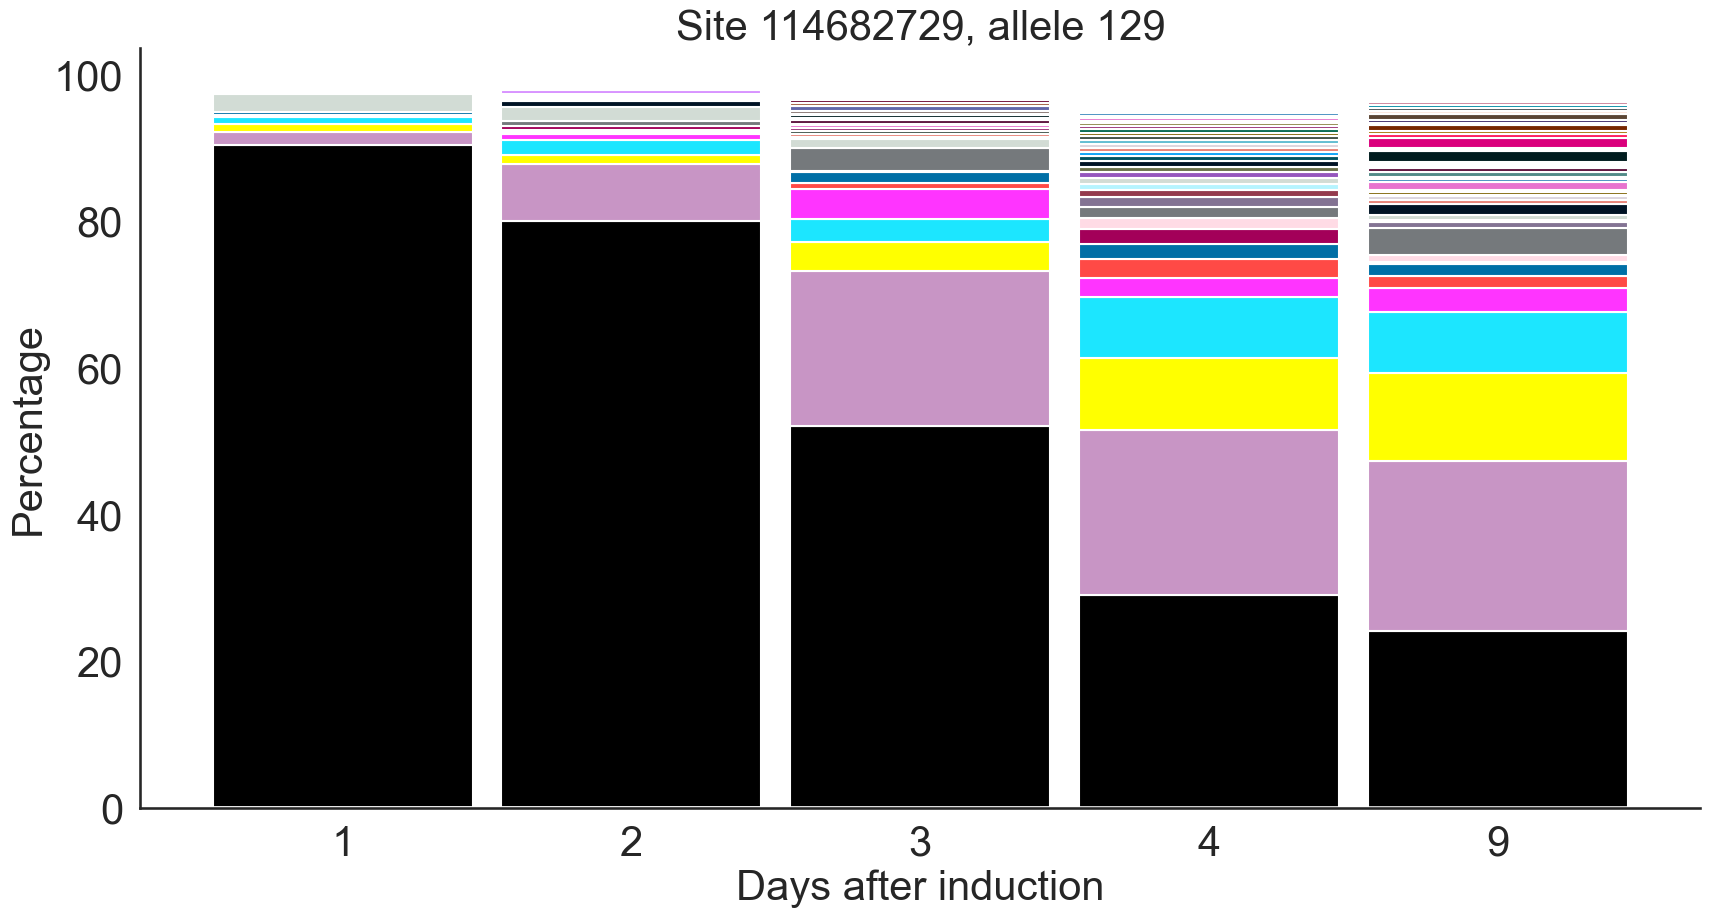

In [38]:
sns.set_style('white')
sns.set_context("talk")
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

order = [5,4,3,0,6]
#plotting percentages 129
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114682729].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)
orderedpercentagepersite129pd = percentagepersite129pd.iloc[order]


ax = orderedpercentagepersite129pd.plot.bar(stacked=True,figsize=(20,10),fontsize = 30,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=30)
ax.set_title('Site 114682729, allele 129', fontsize=30)
ax.set_ylabel("Percentage",fontsize=30)
ax.tick_params(axis='x', rotation=0)
sns.despine()
sns.set_style('white')
sns.set_context("talk")
#'ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([],frameon=False)

#plotting percentages NA
#percentagepersiteNA = []
#for cell in percentagesChr12_NA:
#    percentagepersiteNA.append(percentagesChr12_NA[cell][114682729].dropna())

#percentagepersiteNApd = pd.DataFrame(percentagepersiteNA)
#orderedpercentagepersiteNApd = percentagepersiteNApd.iloc[order]

#ax = orderedpercentagepersiteNApd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
#ax.set_xlabel("Days after induction",fontsize=10)
#ax.set_title('Site 114682729,allele NA', fontsize=10)
#ax.set_ylabel("Percentage",fontsize=10)
#ax.tick_params(axis='x', rotation=0)
#sns.despine()
#ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([])

In [39]:
ts2 = []
for site in percentagesChr12_B6.index.levels[0].unique():
    if site in targetsites:
        ts2.append(site)
ts2

[114723869,
 114740505,
 114746371,
 114843748,
 114851288,
 114879985,
 114910108,
 114914696]

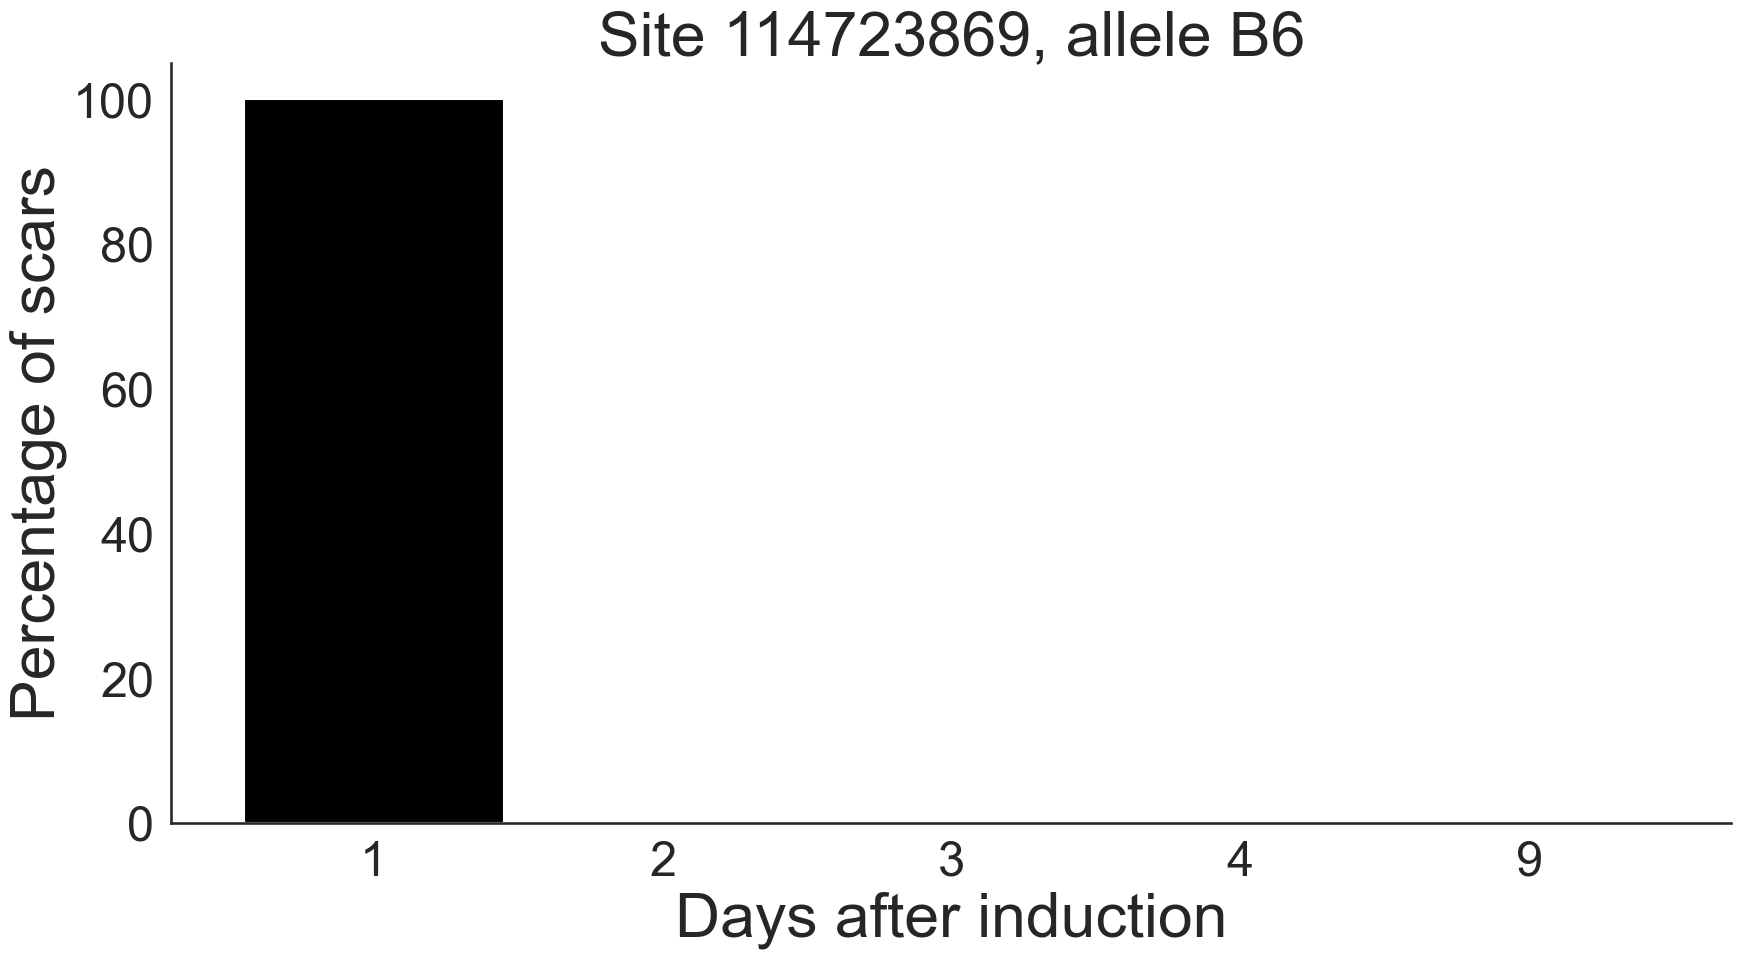

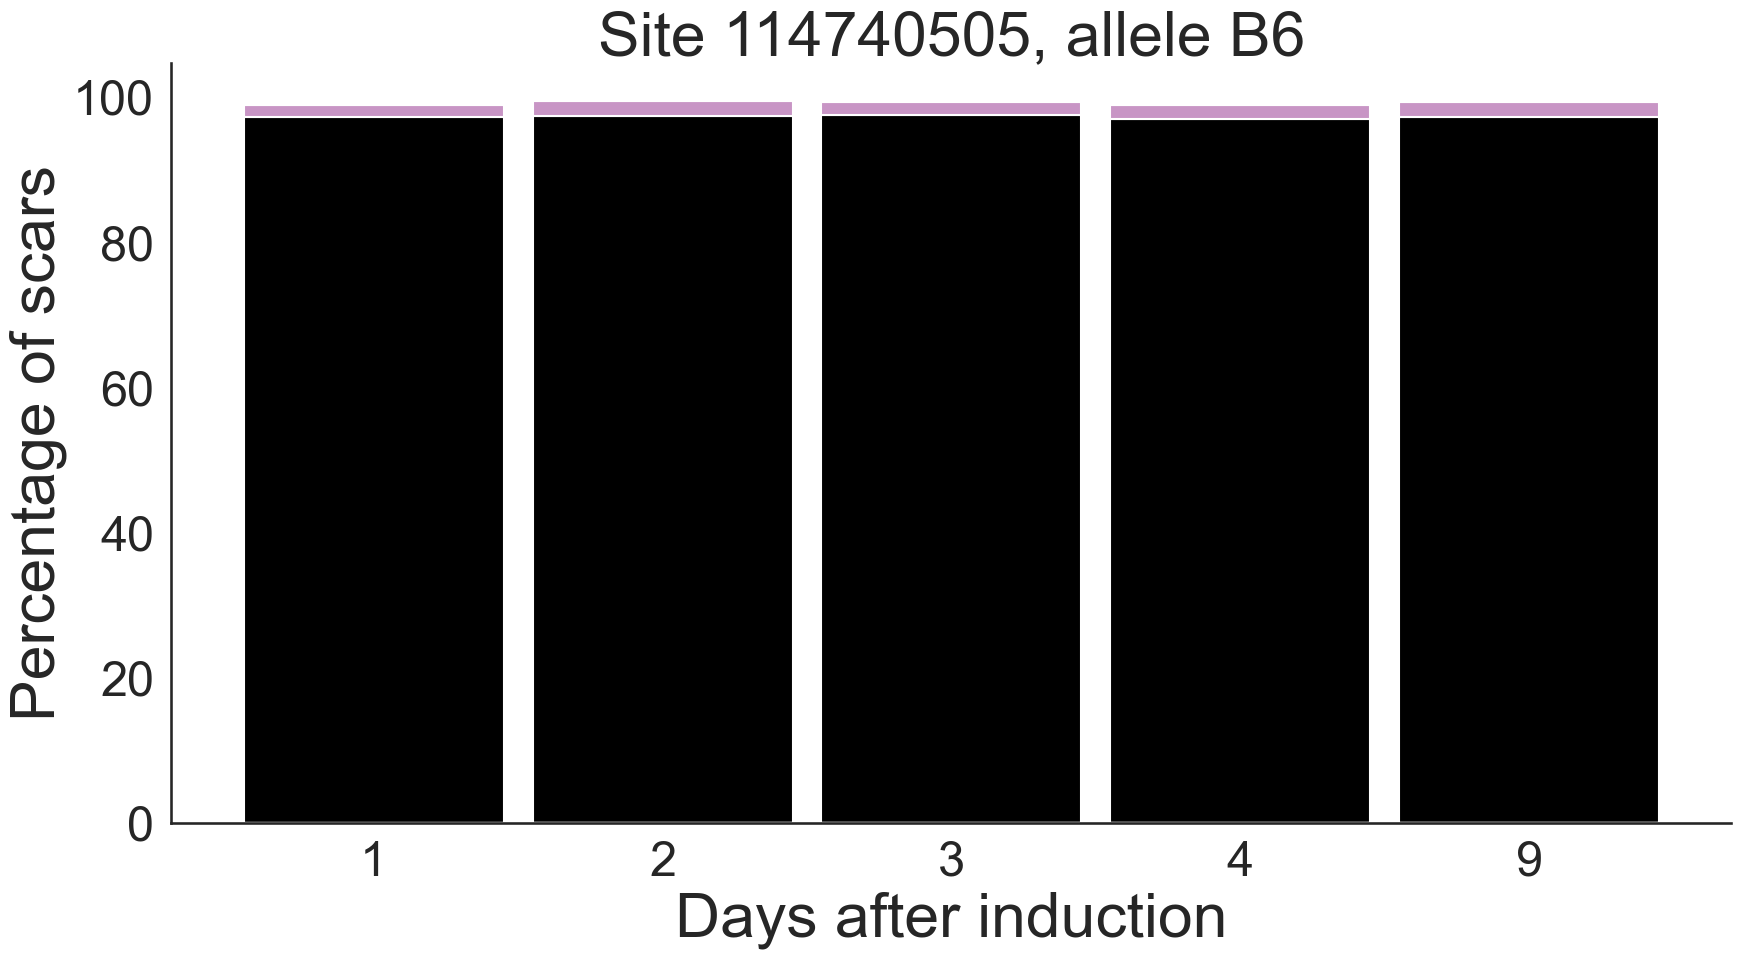

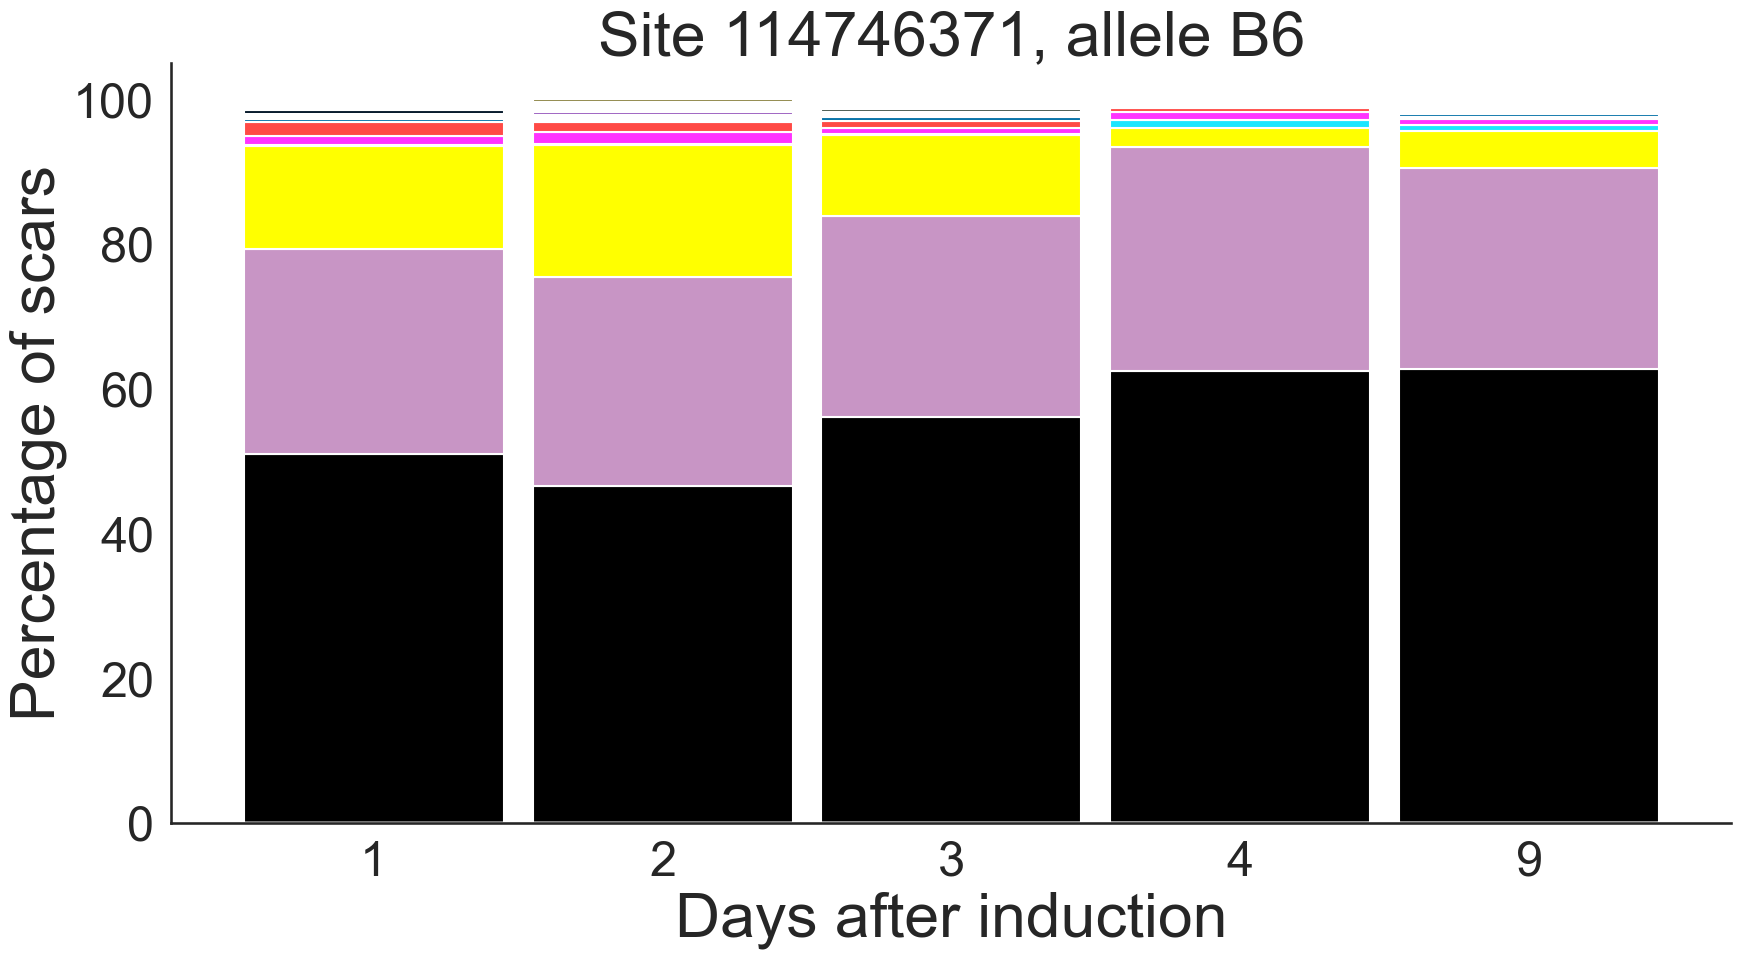

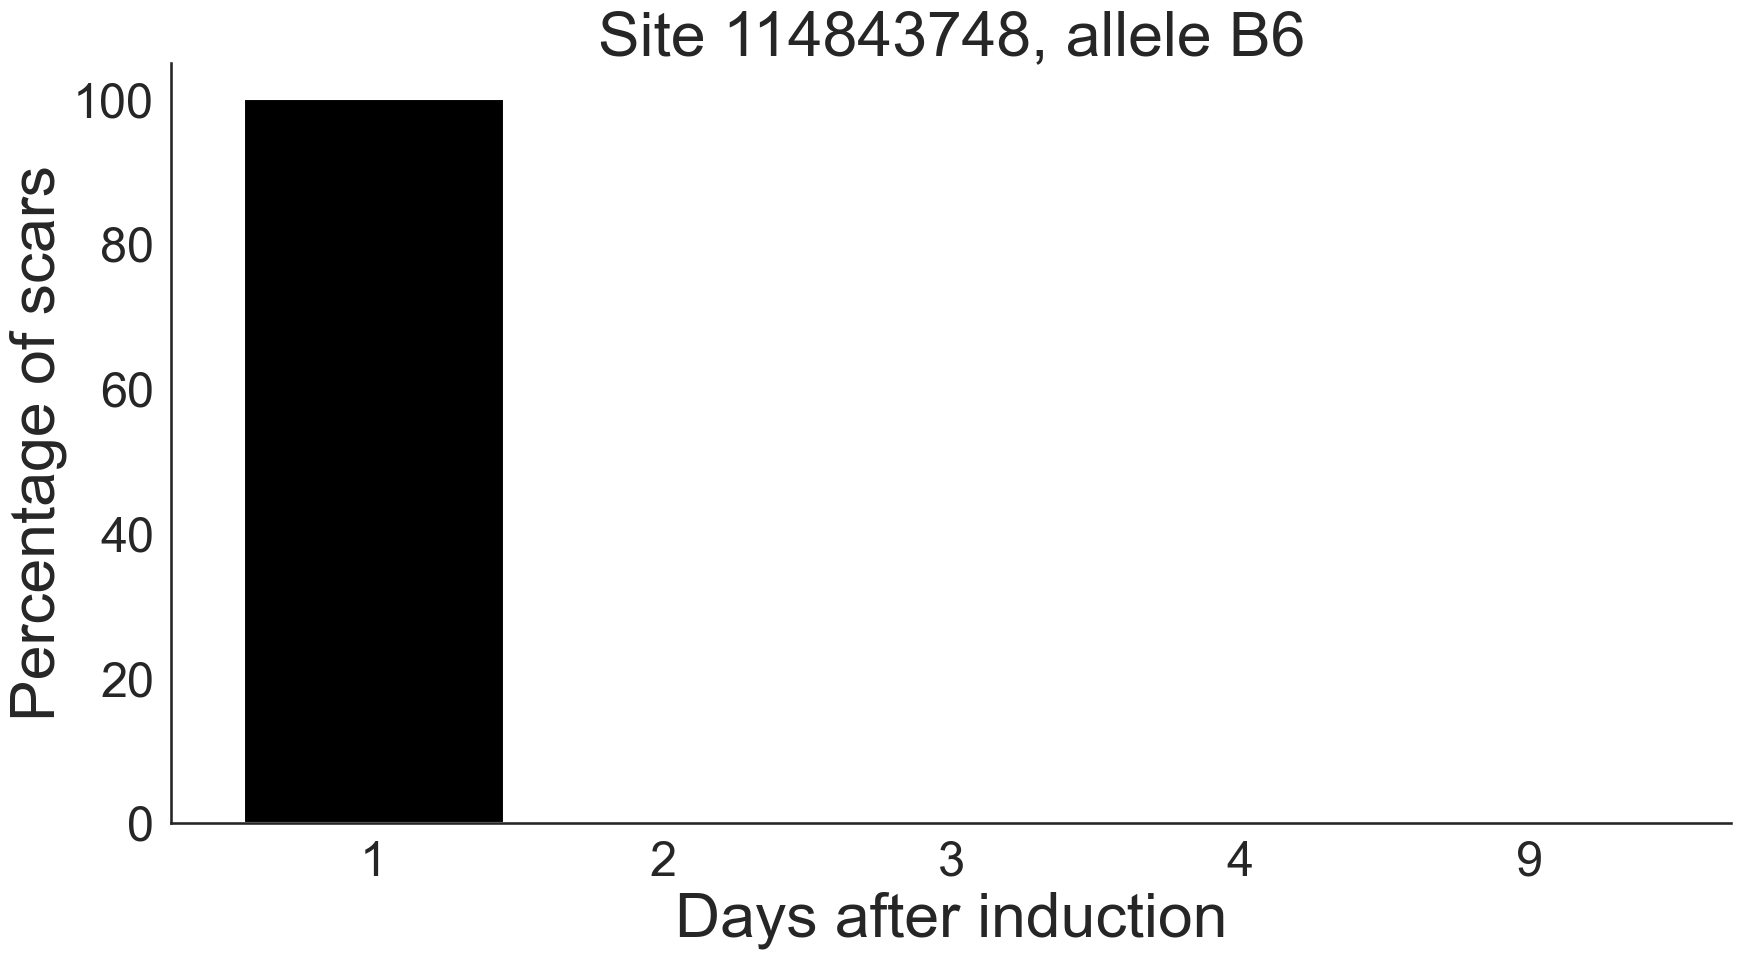

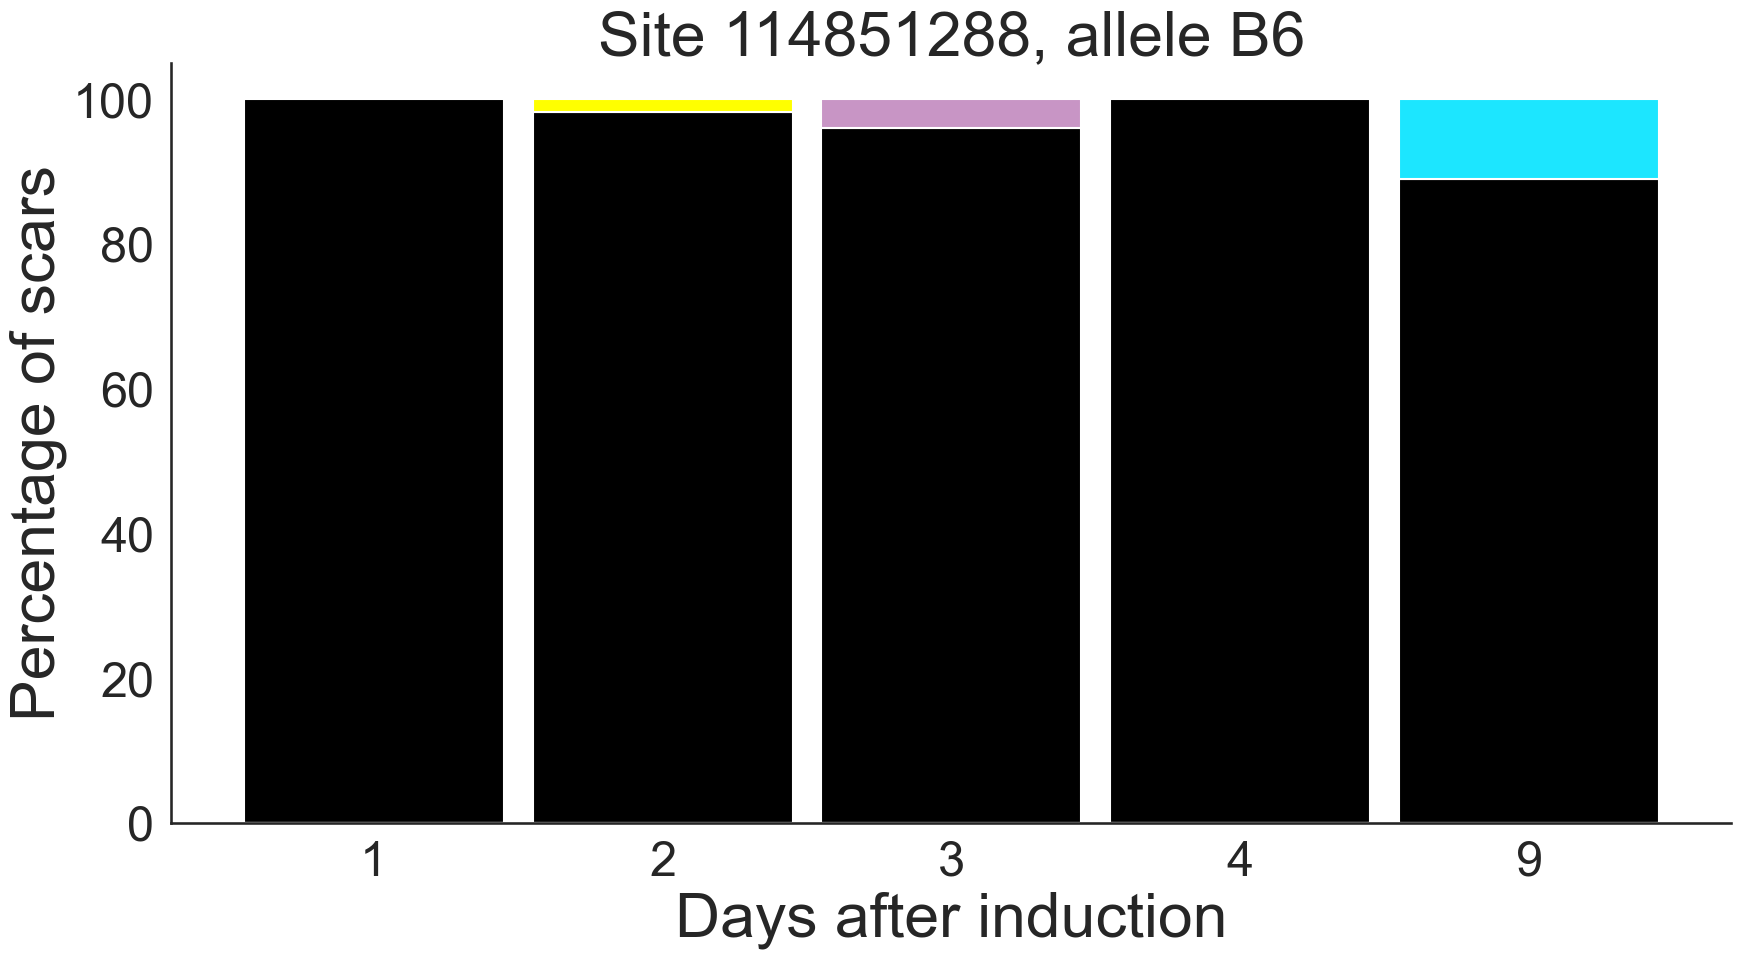

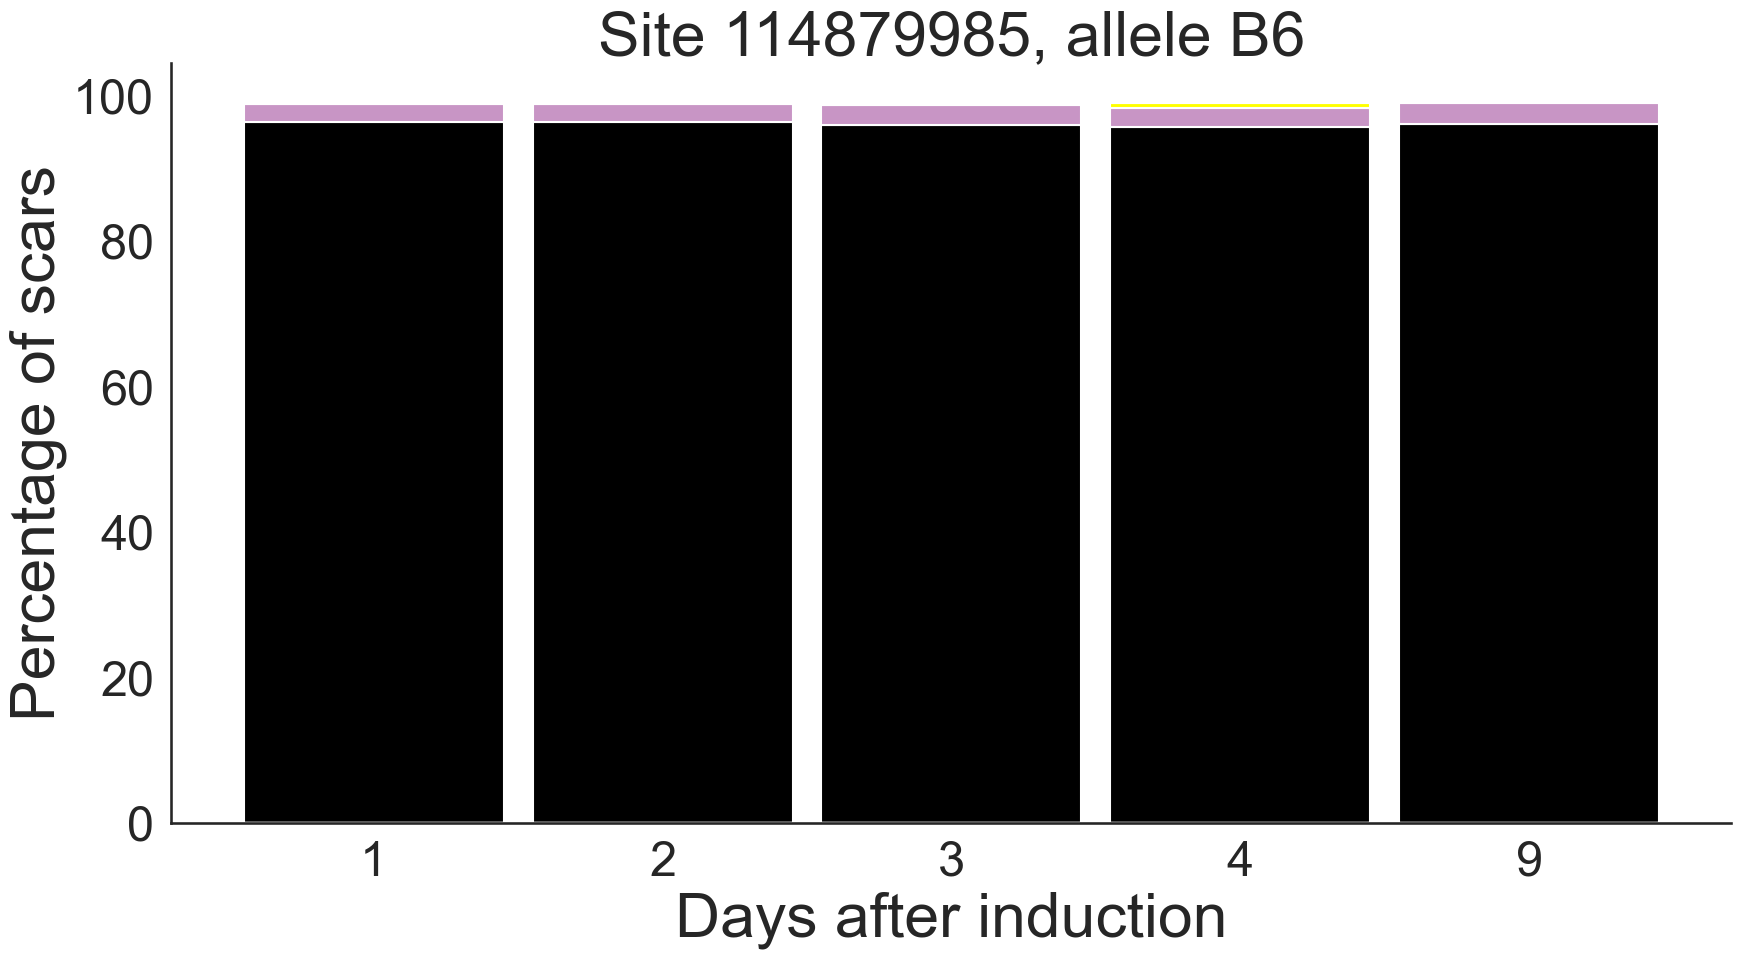

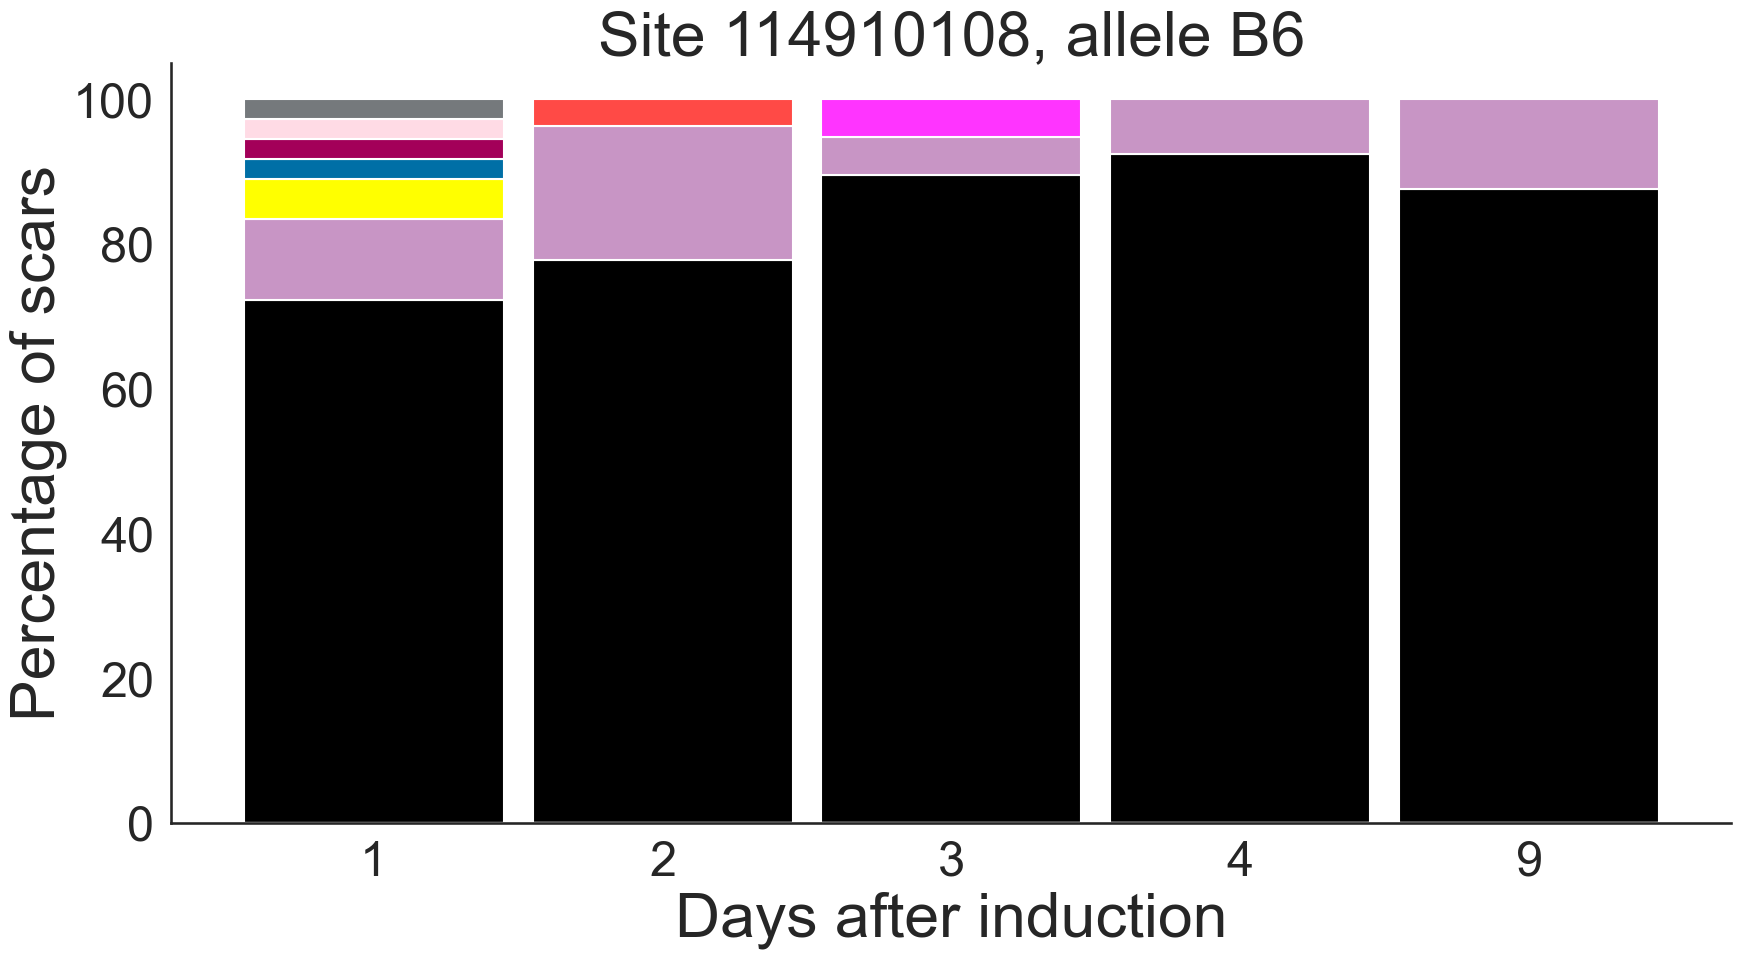

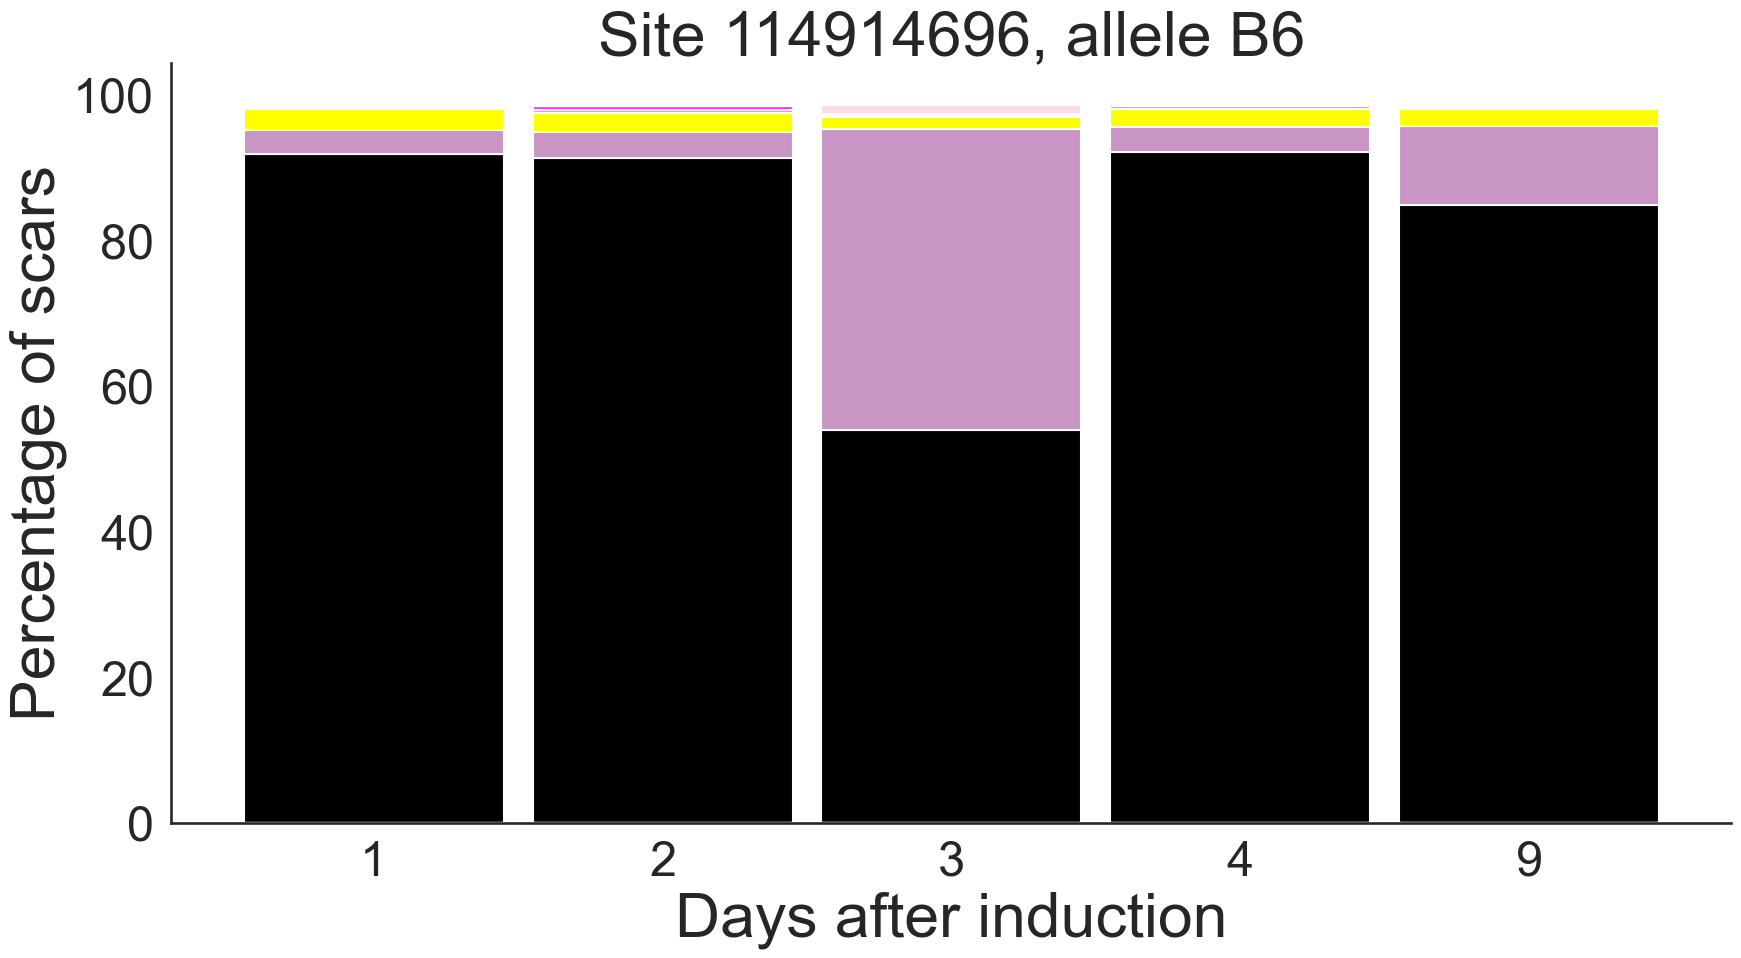

In [40]:
targetsites = [114682729, 14708745, 114723869, 114740505,114746371, 114788470, 114843748, 114851288,
          114879985,114896335,114910108,114914696,114736342]
for site in percentagesChr12_B6.index.levels[0].unique():
    if site in targetsites:
        sns.set_style('white')
        sns.set_context("talk")
        mpl.rcParams['pdf.fonttype'] = 42
        mpl.rcParams['ps.fonttype'] = 42
        mpl.rcParams['font.family'] = 'Arial'
        fontsize = 45
        #plotting percentages 129
        percentagepersiteB6 = []
        for cell in percentagesChr12_B6:
            percentagepersiteB6.append(percentagesChr12_B6[cell][site].dropna())

        percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)
        orderedpercentagepersiteB6pd = percentagepersiteB6pd.iloc[order]


        ax = orderedpercentagepersiteB6pd.plot.bar(stacked=True,figsize=(20,10),fontsize = 35,
                                                   width=0.90, 
                                                   color=cols)
        ax.set_xlabel("Days after induction",fontsize=fontsize)
        ax.set_title('Site ' + str(site) + ', allele B6', fontsize=fontsize)
        ax.set_ylabel("Percentage of scars",fontsize=fontsize)
        ax.tick_params(axis='x', rotation=0)
        sns.despine()
        sns.set_style('white')
        sns.set_context("talk")
        #'ax.legend(bbox_to_anchor=(0.9,-0.1))
        ax.legend([],frameon=False)



In [41]:
columns = orderedpercentagepersiteB6pd.columns.tolist()
columns = [columns[2]] + columns[0:2] + columns[3:]

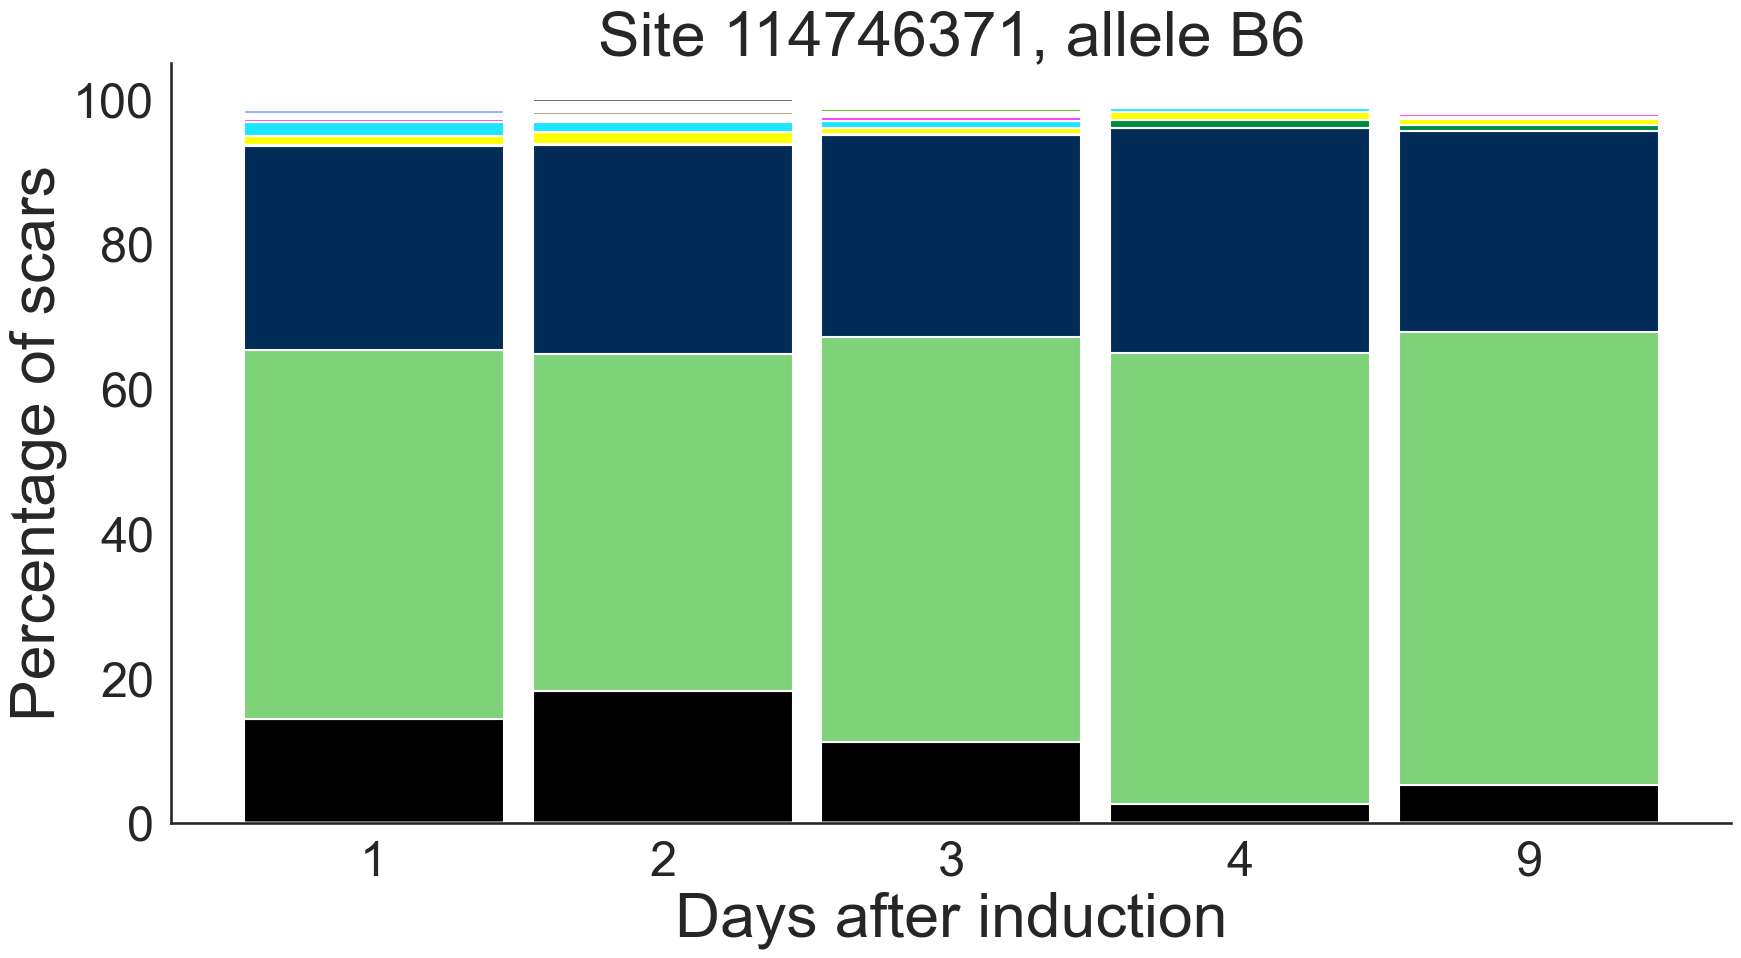

In [42]:
cols=['black',#"#C895C5", #"#320033",  "#FF6832", "#66E1D3", "#CFCDAC", "#D0AC94",
      "#7ED379", "#012C58","#008941",
      "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#006FA6", "#A30059","#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80","#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100","#7A7BFF", "#D68E01", "#353339", "#78AFA1", "#FEB2C6", "#75797C", "#837393", "#943A4D", "#B5F4FF", "#D2DCD5", "#9556BD", "#6A714A", "#001325", "#02525F", "#0AA3F7", "#E98176","#DBD5DD", "#5EBCD1", "#3D4F44", "#7E6405", "#02684E", "#962B75", "#8D8546", "#9695C5", "#E773CE", "#D86A78", "#3E89BE", "#CA834E", "#518A87", "#5B113C", "#55813B", "#E704C4", "#00005F", "#A97399", "#4B8160", "#59738A", "#FF5DA7", "#F7C9BF", "#643127", "#513A01","#83AB58", "#001C1E", "#D1F7CE", "#004B28", "#C8D0F6", "#A3A489", "#806C66", "#222800","#BF5650", "#E83000", "#66796D", "#DA007C", "#FF1A59", "#8ADBB4", "#1E0200", "#5B4E51","#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700","#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329","#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C","#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F","#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09","#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66","#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00","#BDC9D2", "#9FA064", "#BE4700", "#658188", "#83A485", "#453C23", "#47675D", "#3A3F00","#061203", "#DFFB71", "#868E7E", "#98D058", "#6C8F7D", "#D7BFC2", "#3C3E6E", "#D83D66","#2F5D9B", "#6C5E46", "#D25B88", "#5B656C", "#00B57F", "#545C46", "#866097", "#365D25","#252F99", "#00CCFF", "#674E60", "#FC009C", "#92896B", "#1E2324", "#DEC9B2", "#9D4948","#85ABB4", "#342142", "#D09685", "#A4ACAC", "#00FFFF", "#AE9C86", "#742A33", "#0E72C5","#AFD8EC", "#C064B9", "#91028C", "#FEEDBF", "#FFB789", "#9CB8E4", "#AFFFD1", "#2A364C","#4F4A43", "#647095", "#34BBFF", "#807781", "#920003", "#B3A5A7", "#018615", "#F1FFC8","#976F5C", "#FF3BC1", "#FF5F6B", "#077D84", "#F56D93", "#5771DA", "#4E1E2A", "#830055","#02D346", "#BE452D", "#00905E", "#BE0028", "#6E96E3", "#007699", "#FEC96D", "#9C6A7D","#3FA1B8", "#893DE3", "#79B4D6", "#7FD4D9", "#6751BB", "#B28D2D", "#E27A05", "#DD9CB8","#AABC7A", "#980034", "#561A02", "#8F7F00", "#635000", "#CD7DAE", "#8A5E2D", "#FFB3E1","#6B6466", "#C6D300", "#0100E2", "#88EC69", "#8FCCBE", "#21001C", "#511F4D", "#E3F6E3","#FF8EB1", "#6B4F29", "#A37F46", "#6A5950", "#1F2A1A", "#04784D", "#101835", "#E6E0D0","#FF74FE", "#00A45F", "#8F5DF8", "#4B0059", "#412F23", "#D8939E", "#DB9D72", "#604143","#B5BACE", "#989EB7", "#D2C4DB", "#A587AF", "#77D796", "#7F8C94", "#FF9B03", "#555196","#31DDAE", "#74B671", "#802647", "#2A373F", "#014A68", "#696628", "#4C7B6D", "#002C27","#7A4522", "#3B5859", "#E5D381", "#FFF3FF", "#679FA0", "#261300", "#2C5742", "#9131AF","#AF5D88", "#C7706A", "#61AB1F", "#8CF2D4", "#C5D9B8", "#9FFFFB", "#BF45CC", "#493941","#863B60", "#B90076", "#003177", "#C582D2", "#C1B394", "#602B70", "#887868", "#BABFB0","#030012", "#D1ACFE", "#7FDEFE", "#4B5C71", "#A3A097", "#E66D53", "#637B5D", "#92BEA5","#6B94AA", "#51A058", "#A45B02", "#1D1702", "#E20027", "#E7AB63", "#4C6001", "#9C6966","#64547B", "#97979E", "#006A66", "#391406", "#F4D749", "#0045D2", "#006C31", "#DDB6D0","#7C6571", "#9FB2A4", "#00D891", "#15A08A", "#BC65E9", "#FFFFFE", "#C6DC99", "#203B3C","#671190", "#6B3A64", "#F5E1FF", "#FFA0F2", "#CCAA35", "#374527", "#8BB400", "#797868","#C6005A", "#3B000A", "#C86240", "#29607C", "#402334", "#7D5A44", "#CCB87C", "#B88183","#AA5199", "#B5D6C3", "#A38469", "#9F94F0", "#A74571", "#B894A6", "#71BB8C", "#00B433","#789EC9", "#6D80BA", "#953F00", "#5EFF03", "#E4FFFC", "#1BE177", "#BCB1E5", "#76912F","#003109", "#0060CD", "#D20096", "#895563", "#29201D", "#5B3213", "#A76F42", "#89412E","#1A3A2A", "#494B5A", "#A88C85", "#F4ABAA", "#A3F3AB", "#00C6C8", "#EA8B66", "#958A9F", "#00F8B3", "#BEDDFF", "#3DB5A7", "#DD3248", "#B6E4DE", "#427745", "#598C5A", "#B94C59","#8181D5", "#94888B", "#FED6BD", "#536D31", "#6EFF92", "#E4E8FF", "#20E200", "#FFD0F2","#4C83A1", "#BD7322", "#915C4E", "#8C4787", "#025117", "#A2AA45", "#2D1B21", "#A9DDB0","#FF4F78", "#528500", "#009A2E", "#17FCE4", "#71555A", "#525D82", "#00195A", "#967874","#555558", "#0B212C", "#1E202B", "#EFBFC4", "#6F9755", "#6F7586", "#501D1D", "#372D00","#741D16", "#5EB393", "#B5B400", "#DD4A38", "#363DFF", "#AD6552", "#6635AF", "#836BBA","#98AA7F", "#464836", "#322C3E", "#7CB9BA", "#5B6965", "#707D3D", "#7A001D", "#6E4636","#443A38", "#AE81FF", "#489079", "#897334", "#009087", "#DA713C", "#361618", "#FF6F01","#006679", "#370E77", "#4B3A83", "#C9E2E6", "#C44170", "#FF4526", "#73BE54", "#C4DF72","#ADFF60", "#00447D", "#DCCEC9", "#BD9479", "#656E5B", "#EC5200", "#FF6EC2", "#7A617E","#DDAEA2", "#77837F", "#A53327", "#608EFF", "#B599D7", "#A50149", "#4E0025", "#C9B1A9","#03919A", "#1B2A25", "#E500F1", "#982E0B", "#B67180", "#E05859", "#006039", "#578F9B","#305230", "#CE934C", "#B3C2BE", "#C0BAC0", "#B506D3", "#170C10", "#4C534F", "#224451","#3E4141", "#78726D", "#B6602B", "#200441", "#DDB588", "#497200", "#C5AAB6", "#033C61","#71B2F5", "#A9E088", "#4979B0", "#A2C3DF", "#784149", "#2D2B17", "#3E0E2F", "#57344C","#0091BE", "#E451D1", "#4B4B6A", "#5C011A", "#7C8060", "#FF9491", "#4C325D", "#005C8B","#E5FDA4", "#68D1B6", "#032641", "#140023", "#8683A9", "#CFFF00", "#A72C3E", "#34475A","#B1BB9A", "#B4A04F", "#8D918E", "#A168A6", "#813D3A", "#425218", "#DA8386", "#776133","#563930", "#8498AE", "#90C1D3", "#B5666B", "#9B585E", "#856465", "#AD7C90", "#E2BC00","#E3AAE0", "#B2C2FE", "#FD0039", "#009B75", "#FFF46D", "#E87EAC", "#DFE3E6", "#848590","#AA9297", "#83A193", "#577977", "#3E7158", "#C64289", "#EA0072", "#C4A8CB", "#55C899","#E78FCF", "#004547", "#F6E2E3", "#966716", "#378FDB", "#435E6A", "#DA0004", "#1B000F","#5B9C8F", "#6E2B52", "#011115", "#E3E8C4", "#AE3B85", "#EA1CA9", "#FF9E6B", "#457D8B","#92678B", "#00CDBB", "#9CCC04", "#002E38", "#96C57F", "#CFF6B4", "#492818", "#766E52","#20370E", "#E3D19F", "#2E3C30", "#B2EACE", "#F3BDA4", "#A24E3D", "#976FD9", "#8C9FA8","#7C2B73", "#4E5F37", "#5D5462", "#90956F", "#6AA776", "#DBCBF6", "#DA71FF", "#987C95","#52323C", "#BB3C42", "#584D39", "#4FC15F", "#A2B9C1", "#79DB21", "#1D5958", "#BD744E","#160B00", "#20221A", "#6B8295", "#00E0E4", "#102401", "#1B782A", "#DAA9B5", "#B0415D","#859253", "#97A094", "#06E3C4", "#47688C", "#7C6755", "#075C00", "#7560D5", "#7D9F00","#C36D96", "#4D913E", "#5F4276", "#FCE4C8", "#303052", "#4F381B", "#E5A532", "#706690","#AA9A92", "#237363", "#73013E", "#FF9079", "#A79A74", "#029BDB", "#FF0169", "#C7D2E7","#CA8869", "#80FFCD", "#BB1F69", "#90B0AB", "#7D74A9", "#FCC7DB", "#99375B", "#00AB4D","#ABAED1", "#BE9D91", "#E6E5A7", "#332C22", "#DD587B", "#F5FFF7", "#5D3033", "#6D3800","#FF0020", "#B57BB3", "#D7FFE6", "#C535A9", "#260009", "#6A8781", "#A8ABB4", "#D45262","#794B61", "#4621B2", "#8DA4DB", "#C7C890", "#6FE9AD", "#A243A7", "#B2B081", "#181B00","#286154", "#4CA43B", "#6A9573", "#A8441D", "#5C727B", "#738671", "#D0CFCB", "#897B77","#1F3F22", "#4145A7", "#DA9894", "#A1757A", "#63243C", "#ADAAFF", "#00CDE2", "#DDBC62","#698EB1", "#208462", "#00B7E0", "#614A44", "#9BBB57", "#7A5C54", "#857A50", "#766B7E","#014833", "#FF8347", "#7A8EBA", "#274740", "#946444", "#EBD8E6", "#646241", "#373917","#6AD450", "#81817B", "#D499E3", "#979440", "#011A12", "#526554", "#B5885C", "#A499A5","#03AD89", "#B3008B", "#E3C4B5", "#96531F", "#867175", "#74569E", "#617D9F", "#E70452","#067EAF", "#A697B6", "#B787A8", "#9CFF93", "#311D19", "#3A9459", "#6E746E", "#B0C5AE","#84EDF7", "#ED3488", "#754C78", "#384644", "#C7847B", "#00B6C5", "#7FA670", "#C1AF9E","#2A7FFF", "#72A58C", "#FFC07F", "#9DEBDD", "#D97C8E", "#7E7C93", "#62E674", "#B5639E","#FFA861", "#C2A580", "#8D9C83", "#B70546", "#372B2E", "#0098FF", "#985975", "#20204C","#FF6C60", "#445083", "#8502AA", "#72361F", "#9676A3", "#484449", "#CED6C2", "#3B164A","#CCA763", "#2C7F77", "#02227B", "#A37E6F", "#CDE6DC", "#CDFFFB", "#BE811A", "#F77183","#EDE6E2", "#CDC6B4", "#FFE09E", "#3A7271", "#FF7B59", "#4E4E01", "#4AC684", "#8BC891","#BC8A96", "#CF6353", "#DCDE5C", "#5EAADD", "#F6A0AD", "#E269AA", "#A3DAE4", "#436E83","#002E17", "#ECFBFF", "#A1C2B6", "#50003F", "#71695B", "#67C4BB", "#536EFF", "#5D5A48","#890039", "#969381", "#371521", "#5E4665", "#AA62C3", "#8D6F81", "#2C6135", "#410601","#564620", "#E69034", "#6DA6BD", "#E58E56", "#E3A68B", "#48B176", "#D27D67", "#B5B268","#7F8427", "#FF84E6", "#435740", "#EAE408", "#F4F5FF", "#325800", "#4B6BA5", "#ADCEFF","#9B8ACC", "#885138", "#5875C1", "#7E7311", "#FEA5CA", "#9F8B5B", "#A55B54", "#89006A","#AF756F", "#2A2000", "#7499A1", "#FFB550", "#00011E", "#D1511C", "#688151", "#BC908A","#78C8EB", "#8502FF", "#483D30", "#C42221", "#5EA7FF", "#785715", "#0CEA91", "#FFFAED","#B3AF9D", "#3E3D52", "#5A9BC2", "#9C2F90", "#8D5700", "#ADD79C", "#00768B", "#337D00","#C59700", "#3156DC", "#944575", "#ECFFDC", "#D24CB2", "#97703C", "#4C257F", "#9E0366","#88FFEC", "#B56481", "#396D2B", "#56735F", "#988376", "#9BB195", "#A9795C", "#E4C5D3","#9F4F67", "#1E2B39", "#664327", "#AFCE78", "#322EDF", "#86B487", "#C23000", "#ABE86B","#96656D", "#250E35", "#A60019", "#0080CF", "#CAEFFF", "#323F61", "#A449DC", "#6A9D3B","#FF5AE4", "#636A01", "#D16CDA", "#736060", "#FFBAAD", "#D369B4", "#FFDED6", "#6C6D74","#927D5E", "#845D70", "#5B62C1", "#2F4A36", "#E45F35", "#FF3B53", "#AC84DD", "#762988","#70EC98", "#408543", "#2C3533", "#2E182D", "#323925", "#19181B", "#2F2E2C", "#023C32","#9B9EE2", "#58AFAD", "#5C424D", "#7AC5A6", "#685D75", "#B9BCBD", "#834357", "#1A7B42","#2E57AA", "#E55199", "#316E47", "#CD00C5", "#6A004D", "#7FBBEC", "#F35691", "#D7C54A","#62ACB7", "#CBA1BC", "#A28A9A", "#6C3F3B", "#FFE47D", "#DCBAE3", "#5F816D", "#3A404A","#7DBF32", "#E6ECDC", "#852C19", "#285366", "#B8CB9C", "#0E0D00", "#4B5D56", "#6B543F","#E27172", "#0568EC", "#2EB500", "#D21656", "#EFAFFF", "#682021", "#2D2011", "#DA4CFF","#70968E", "#FF7B7D", "#4A1930", "#E8C282", "#E7DBBC", "#A68486", "#1F263C", "#36574E","#52CE79", "#ADAAA9", "#8A9F45", "#6542D2", "#00FB8C", "#5D697B", "#CCD27F", "#94A5A1","#790229", "#E383E6", "#7EA4C1", "#4E4452", "#4B2C00", "#620B70", "#314C1E", "#874AA6","#E30091", "#66460A", "#EB9A8B", "#EAC3A3", "#98EAB3", "#AB9180", "#B8552F", "#1A2B2F","#94DDC5", "#9D8C76", "#9C8333", "#94A9C9", "#392935", "#8C675E", "#CCE93A", "#917100","#01400B", "#449896", "#1CA370", "#E08DA7", "#8B4A4E", "#667776", "#4692AD", "#67BDA8","#69255C", "#D3BFFF", "#4A5132", "#7E9285", "#77733C", "#E7A0CC", "#51A288", "#2C656A","#4D5C5E", "#C9403A", "#DDD7F3", "#005844", "#B4A200", "#488F69", "#858182", "#D4E9B9","#3D7397", "#CAE8CE", "#D60034", "#AA6746", "#9E5585", "#BA6200"]



sns.set_style('white')
sns.set_context("talk")
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
fontsize = 45
#plotting percentages 129
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114746371].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)
orderedpercentagepersiteB6pd = percentagepersiteB6pd.iloc[order]

columns = orderedpercentagepersiteB6pd.columns.tolist()
columns = [columns[2]] + columns[0:2] + columns[3:]
orderedpercentagepersiteB6pd = orderedpercentagepersiteB6pd[columns]

ax = orderedpercentagepersiteB6pd.plot.bar(stacked=True,figsize=(20,10),fontsize = 35,
                                           width=0.90, 
                                           color=cols)
ax.set_xlabel("Days after induction",fontsize=fontsize)
ax.set_title('Site 114746371, allele B6', fontsize=fontsize)
ax.set_ylabel("Percentage of scars",fontsize=fontsize)
ax.tick_params(axis='x', rotation=0)
sns.despine()
sns.set_style('white')
sns.set_context("talk")
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([],frameon=False)

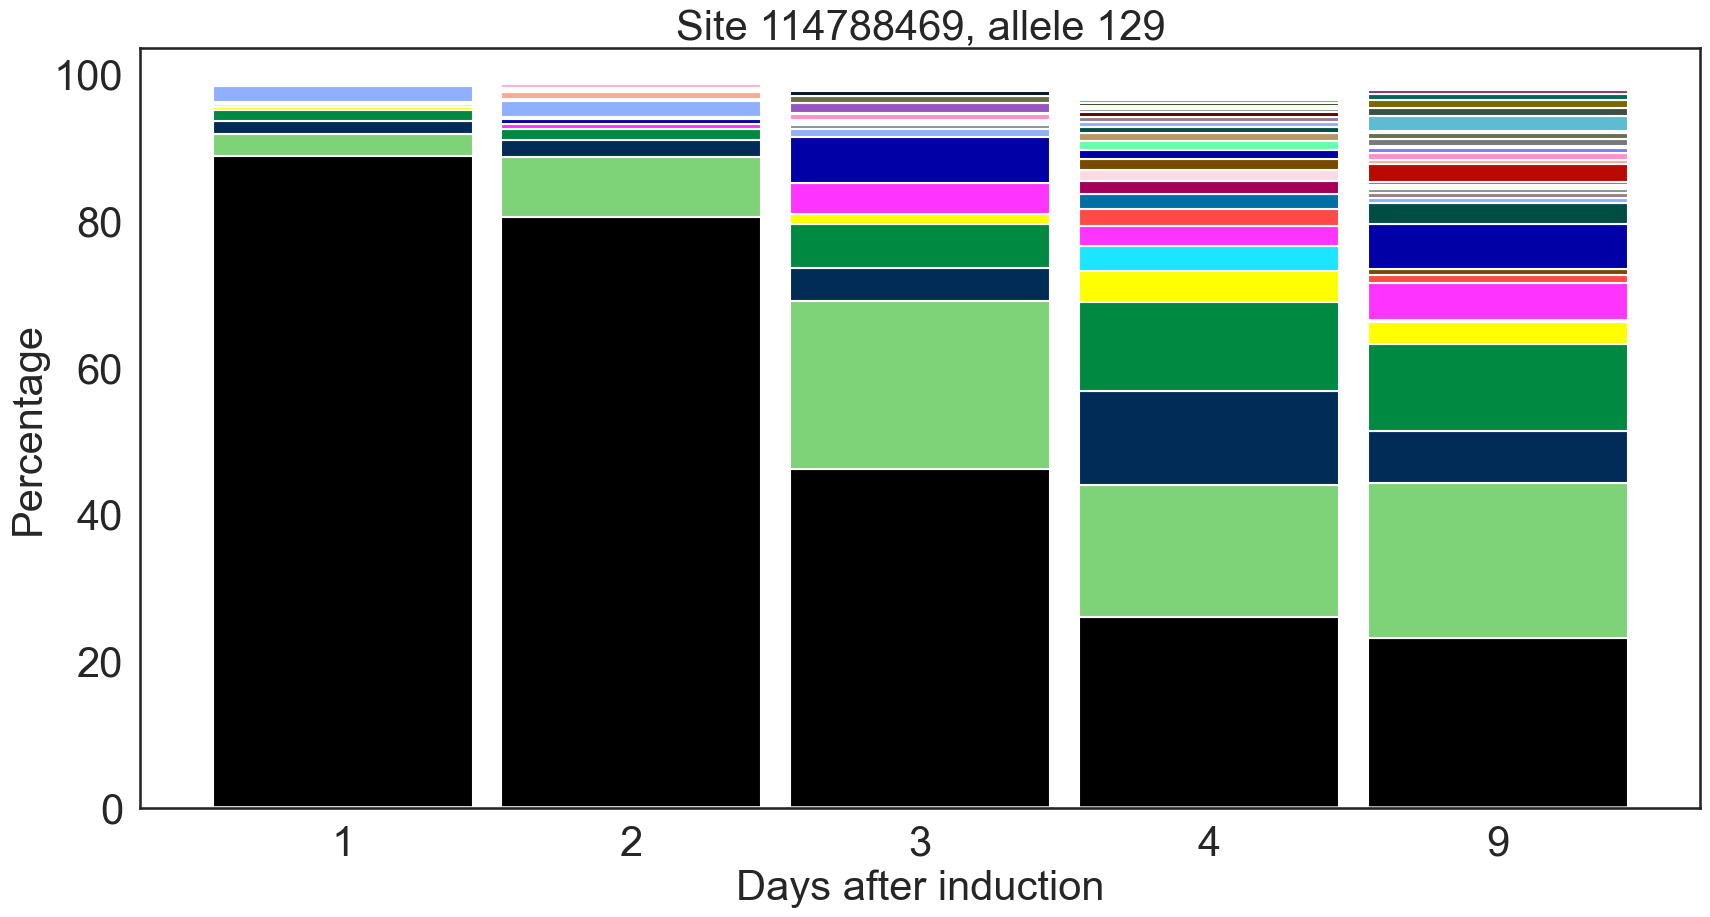

In [43]:
#plotting percentages
percentagepersite = []
for cell in percentagesChr12_129:
    percentagepersite.append(percentagesChr12_129[cell][114788469].dropna())

percentagepersitepd = pd.DataFrame(percentagepersite)
orderedpercentagepersitepd = percentagepersitepd.iloc[order]

ax = orderedpercentagepersitepd.plot.bar(stacked=True,figsize=(20,10),fontsize = 30,width=0.90, color = cols)
ax.set_xlabel("Days after induction",fontsize=30)
ax.set_title('Site 114788469, allele 129', fontsize=30)
ax.set_ylabel("Percentage",fontsize=30)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([],frameon=False)
